> # Case Study : Telecom Churn Case Study

### Problem Statement

>In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn

### Business Goal 

>In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
>We need to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, we need to understand first the typical customer behaviour during churn.

## Loading Modules & Libraries 

In [1]:
import pandas as pd
import numpy as np
import warnings

from scipy import special 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import math
from IPython.display import Markdown, display ,HTML
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")
pd.options.display.float_format = '{:20,.2f}'.format 
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## DATA READING

In [2]:
telecomdata = pd.read_csv("telecom_churn_data.csv")
telecomdata.head(3)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [3]:
telecomdata.shape

(99999, 226)

## DATA PREPARATION & PREPROCESSING

In [4]:
# Let us first extract list of columns containing recharge amount
amt_recharge_columns =  telecomdata.columns[telecomdata.columns.str.contains('rech_amt|rech_data')]
print(amt_recharge_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


In [5]:
# Checking missing values percentages for recharge columns
telecom_data_null_check = 100*telecomdata.loc[:,amt_recharge_columns].isnull().sum()/len(telecomdata)
df = pd.DataFrame(telecom_data_null_check)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage)
display(df)

,Null_Percentage
total_rech_amt_6,0.00
total_rech_amt_7,0.00
total_rech_amt_8,0.00
total_rech_amt_9,0.00
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
date_of_last_rech_data_6,74.85
date_of_last_rech_data_7,74.43


**Observation : We can see more then 74% values for recharge related data are missing.**

In [6]:
telecomdata.loc[:,amt_recharge_columns].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,"99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","25,153.00","25,571.00","26,339.00","25,922.00","25,153.00","25,571.00","26,339.00","25,922.00","25,153.00","25,571.00","26,339.00","25,922.00"
mean,327.51,322.96,324.16,303.35,104.64,104.75,107.73,101.94,2.46,2.67,2.65,2.44,126.39,126.73,125.72,124.94,192.60,200.98,197.53,192.73
std,398.02,408.11,416.54,404.59,120.61,124.52,126.90,125.38,2.79,3.03,3.07,2.52,108.48,109.77,109.44,111.36,192.65,196.79,191.30,188.40
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50,0.50,1.00
25%,109.00,100.00,90.00,52.00,30.00,30.00,30.00,28.00,1.00,1.00,1.00,1.00,25.00,25.00,25.00,25.00,82.00,92.00,87.00,69.00
50%,230.00,220.00,225.00,200.00,110.00,110.00,98.00,61.00,1.00,1.00,1.00,2.00,145.00,145.00,145.00,145.00,154.00,154.00,154.00,164.00
75%,437.50,428.00,434.50,415.00,120.00,128.00,144.00,144.00,3.00,3.00,3.00,3.00,177.00,177.00,179.00,179.00,252.00,252.00,252.00,252.00
max,"35,190.00","40,335.00","45,320.00","37,235.00","4,010.00","4,010.00","4,449.00","3,399.00",61.00,54.00,60.00,84.00,"1,555.00","1,555.00","1,555.00","1,555.00","7,546.00","4,365.00","4,076.00","4,061.00"


### 1. Derive New Feature

**Handling of Missing Values by Imputation**
           As we can see above the minimum value is 1 so we impute the NA values by 0

In [7]:
telecomdata['total_rech_data_6'] = telecomdata['total_rech_data_6'].replace(np.NaN,0.0)
telecomdata['total_rech_data_7'] = telecomdata['total_rech_data_7'].replace(np.NaN,0.0)
telecomdata['total_rech_data_8'] = telecomdata['total_rech_data_8'].replace(np.NaN,0.0)
telecomdata['av_rech_amt_data_6'] = telecomdata['av_rech_amt_data_6'].replace(np.NaN,0.0)
telecomdata['av_rech_amt_data_7'] = telecomdata['av_rech_amt_data_7'].replace(np.NaN,0.0)
telecomdata['av_rech_amt_data_8'] = telecomdata['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [8]:
# Checking missing values percentages
telecom_data_null_check = 100*telecomdata.loc[:,amt_recharge_columns].isnull().sum()/len(telecomdata)
df = pd.DataFrame(telecom_data_null_check)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage)
display(df)

,Null_Percentage
total_rech_amt_6,0.00
total_rech_amt_7,0.00
total_rech_amt_8,0.00
total_rech_amt_9,0.00
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
date_of_last_rech_data_6,74.85
date_of_last_rech_data_7,74.43


Observation : Here we see some recharge columns having more than 70 % values which we will be dropping

**Defining total average recharge amount for good phase for months 6 and 7 (the good phase)**
     -Here we create two new features to capture amount utilized by customer for data
     1- total_rech_amt_data using total_rech_data and 
     2- av_rech_amt_data

In [9]:
# let's adding new column total recharge amount for data: total_rech_amt_data for calculating High Value customer process
telecomdata['total_rech_amt_data_6'] = telecomdata.av_rech_amt_data_6 * telecomdata.total_rech_data_6
telecomdata['total_rech_amt_data_7'] = telecomdata.av_rech_amt_data_7 * telecomdata.total_rech_data_7
telecomdata['total_rech_amt_data_8'] = telecomdata.av_rech_amt_data_8 * telecomdata.total_rech_data_8

telecomdata['total_avg_rech_amnt_6_7_GPhase'] = (telecomdata.total_rech_amt_6 + telecomdata.total_rech_amt_data_6 \
                                               + telecomdata.total_rech_amt_7+ telecomdata.total_rech_amt_data_7)/2

### 2. Filter high-value customers
- Those who have recharged with an amount more than or equal to X, where X is greater than 70th percentile of the average recharge amount in the first two months (the good phase)

In [10]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_filter = telecomdata.total_avg_rech_amnt_6_7_GPhase.quantile(0.7)
telecomdata_high_val_cust = telecomdata[telecomdata.total_avg_rech_amnt_6_7_GPhase >= high_value_filter]

In [11]:
#here we created dataframe using high value customers
telecomdata_high_val_cust.shape

(30001, 230)

### 3. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.
The attributes you need to use to tag churners are:total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9
After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [12]:
high_val_cust_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [13]:
# Checking the NA/Null values are present or Not
df = 100*telecomdata_high_val_cust.loc[:,high_val_cust_9].isnull().sum()/len(telecomdata_high_val_cust)
df = pd.DataFrame(df)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage)
display(df)

,Null_Percentage
total_ic_mou_9,0.00
total_og_mou_9,0.00
vol_2g_mb_9,0.00
vol_3g_mb_9,0.00


In [14]:
# Initially set all the values as 0
telecomdata_high_val_cust['churn']= 0

In [15]:
#is_churned boolean flag for customers where above values are zero
is_churned = (telecomdata_high_val_cust.total_ic_mou_9 == 0) & \
             (telecomdata_high_val_cust.total_og_mou_9 == 0) & \
             (telecomdata_high_val_cust.vol_2g_mb_9 ==0) & \
             (telecomdata_high_val_cust.vol_3g_mb_9 ==0)

In [16]:
# set all which having is_churned True condition as 1
telecomdata_high_val_cust.loc[is_churned,'churn']=1

In [17]:
# let us check what's the % of churned customers
100*telecomdata_high_val_cust.churn.sum()/len(telecomdata_high_val_cust)

8.136395453484884

In [18]:
telecomdata_high_val_cust.churn = telecomdata_high_val_cust.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(telecomdata_high_val_cust.churn.value_counts()*100/telecomdata_high_val_cust.shape[0])

Churn Ratio:
0                  91.86
1                   8.14
Name: churn, dtype: float64


In [19]:
print(telecomdata_high_val_cust['churn'].value_counts())

0    27560
1     2441
Name: churn, dtype: int64


#### After tagging churners, we remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [20]:
churn_month_columns =  telecomdata_high_val_cust.columns[telecomdata_high_val_cust.columns.str.contains('_9')]

In [21]:
# drop all columns corresponding to the churn phase
telecomdata_high_val_cust.drop(churn_month_columns,axis=1,inplace=True)

## EDA - To Extract Useful Insights

#### Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

In [22]:
for i in telecomdata_high_val_cust.columns:
    
    if(telecomdata_high_val_cust[i].nunique()==1  ):
        print(i)    

circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8


#### Dropping above features with only one unique value as they will not add any value to our model building and analyis

In [23]:
drop_col_with_unique_col =['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                          'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
                          'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
                          'std_og_t2c_mou_8',  'std_ic_t2o_mou_6', 
                          'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

In [24]:
telecomdata_high_val_cust.drop(drop_col_with_unique_col,axis=1,inplace=True)

In [25]:
telecomdata_high_val_cust.shape[1]

164

In [26]:
# feature type summary
telecomdata_high_val_cust.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 164 columns):
mobile_number                     int64
arpu_6                            float64
arpu_7                            float64
arpu_8                            float64
onnet_mou_6                       float64
onnet_mou_7                       float64
onnet_mou_8                       float64
offnet_mou_6                      float64
offnet_mou_7                      float64
offnet_mou_8                      float64
roam_ic_mou_6                     float64
roam_ic_mou_7                     float64
roam_ic_mou_8                     float64
roam_og_mou_6                     float64
roam_og_mou_7                     float64
roam_og_mou_8                     float64
loc_og_t2t_mou_6                  float64
loc_og_t2t_mou_7                  float64
loc_og_t2t_mou_8                  float64
loc_og_t2m_mou_6                  float64
loc_og_t2m_mou_7                  float64
loc_og_t2m

In [27]:
telecomdata_high_val_cust.describe(include='all')

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
count,"30,001.00","30,001.00","30,001.00","30,001.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","30,001.00","30,001.00","30,001.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","30,001.00","30,001.00","30,001.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00",29928,29903,29418,"30,001.00","30,001.00","30,001.00",16756,17057,15953,"30,001.00","30,001.00","30,001.00","16,756.00","17,057.00","15,953.00","16,756.00","17,057.00","15,953.00","16,756.00","17,057.00","15,953.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","16,756.00","17,057.00","15,95

In [28]:
#In the above summary stats we see that the date columns have Nan values and have no importance for our analysis
#mobile_number being a id column has no importance for our analysis
#so we decide to drop these columns 

id_cols = ['mobile_number']

date_cols = [
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
            ]

In [29]:
#Dropping & checking shape
telecomdata_high_val_cust = telecomdata_high_val_cust.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", telecomdata_high_val_cust.shape)

Shape after dropping:  (30001, 157)


#### 2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

### Analysis of different variables

In [30]:
# function to create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecomdata_high_val_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("BrBG"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("BrBG"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("BrBG"))
    plt.show()

#### a- Analysis of "recharge" related variables

In [31]:
recharge_amnt_columns =  telecomdata_high_val_cust.columns[telecomdata_high_val_cust.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8']

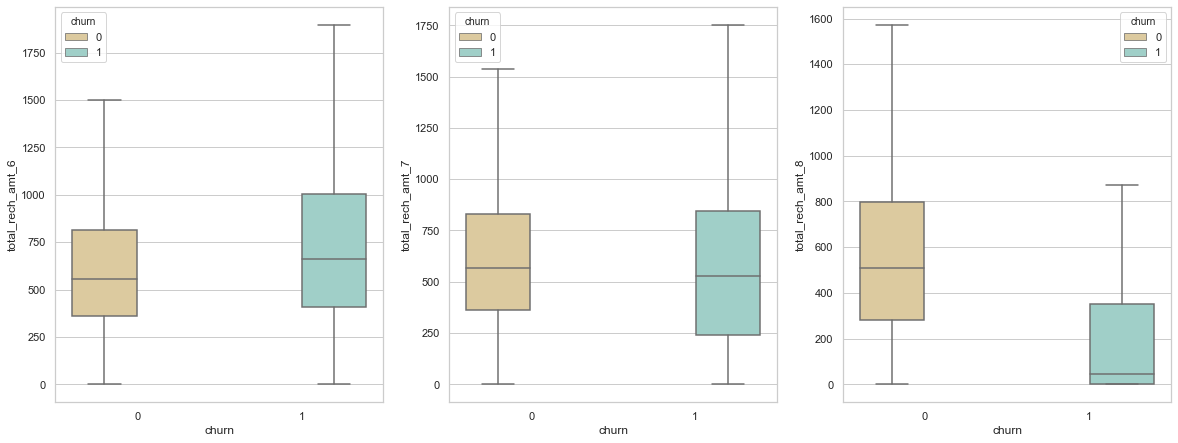

In [32]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).

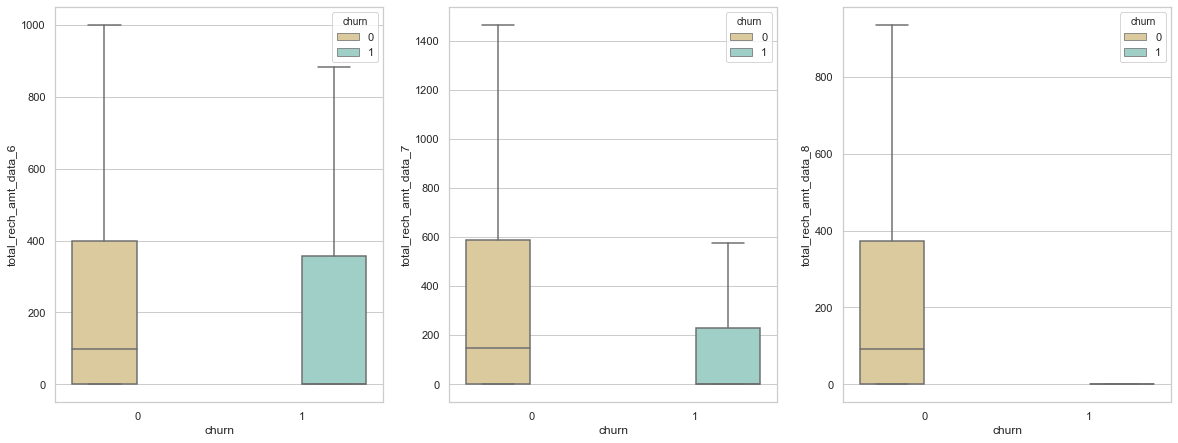

In [33]:
plot_box_chart('total_rech_amt_data')

We can see that there is a huge drop in total recharge amount for data in the 8th month (action phase) for churned customers.

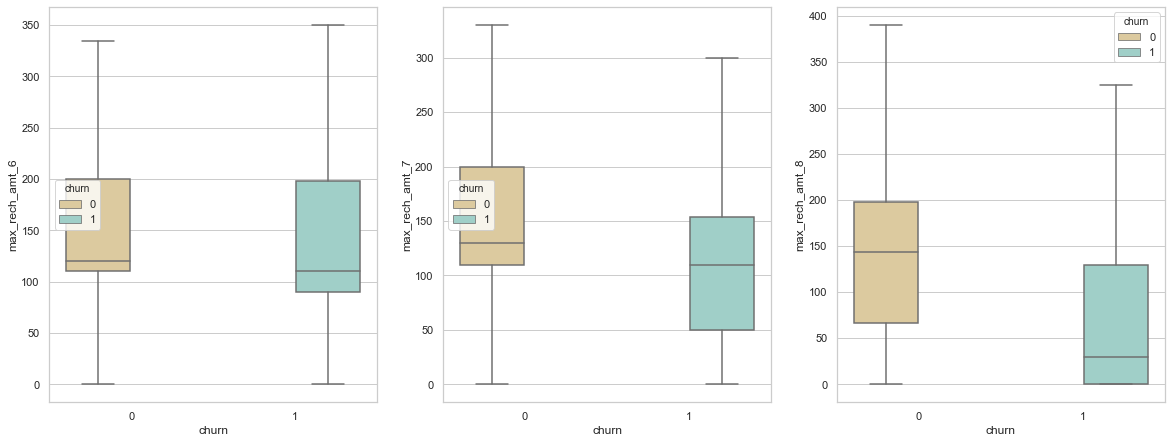

In [34]:
# Ploting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

We can see that there is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.

In [35]:
# Let's check other recharge related variables:
other_recharge = telecomdata_high_val_cust.columns[telecomdata_high_val_cust.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [36]:
100*telecomdata_high_val_cust.loc[:,other_recharge].isnull().sum()/len(telecomdata_high_val_cust)

total_rech_num_6                   0.00
total_rech_num_7                   0.00
total_rech_num_8                   0.00
max_rech_data_6                   44.15
max_rech_data_7                   43.15
max_rech_data_8                   46.83
dtype: float64

In [37]:
telecomdata_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,"16,756.00","17,057.00","15,953.00"
mean,139.80,140.43,136.33
std,118.85,120.25,119.53
min,1.00,1.00,1.00
25%,25.00,25.00,25.00
50%,152.00,152.00,152.00
75%,198.00,198.00,198.00
max,"1,555.00","1,555.00","1,555.00"


We see that the minimum value is 1 while the max is 1555 across months, which indicate the missing values are where no recharges happened for the data, Filling the missing values by 0 , means no recharge.

In [38]:
telecomdata_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= telecomdata_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

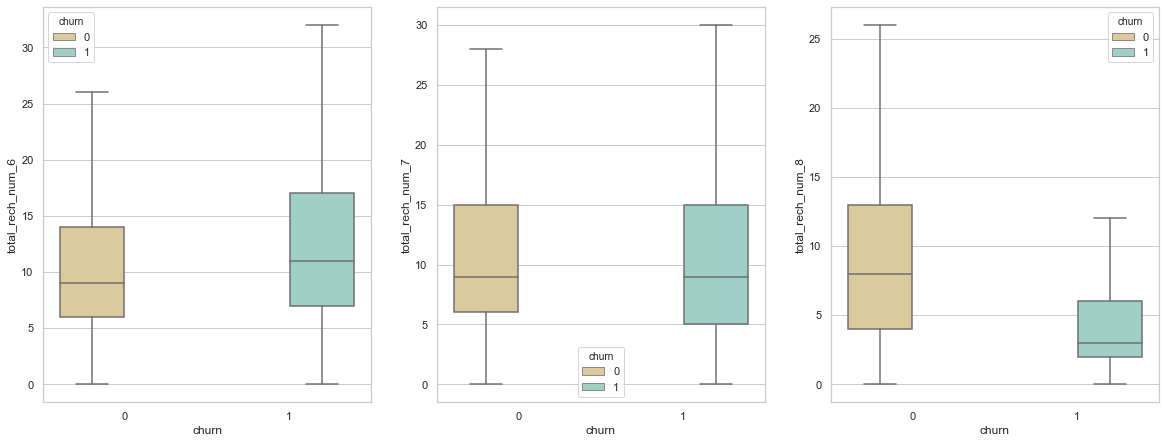

In [39]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')

We can see that there is a huge drop in total recharge number also in the 8th month (action phase) for churned customers.

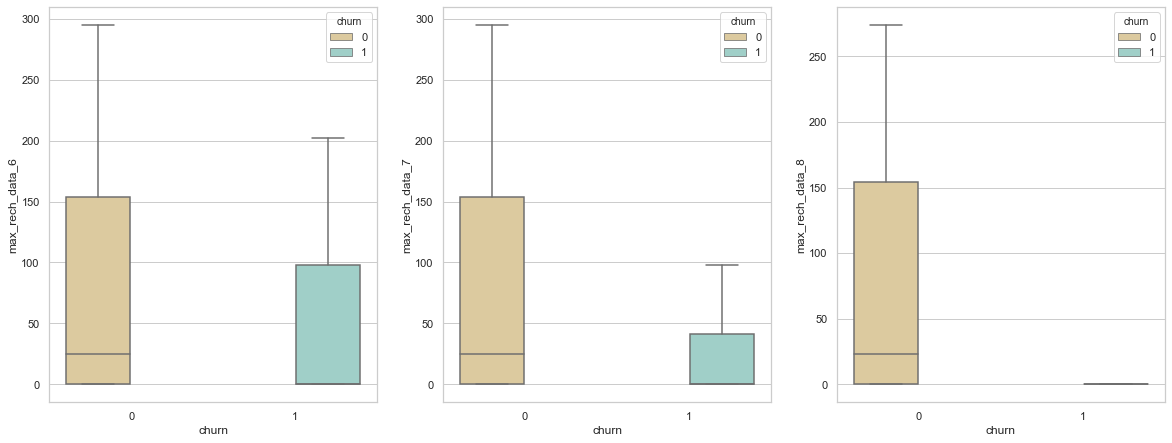

In [40]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')

In [41]:
#Getting the last day recharge amount columns
last_day_rech_amt = telecomdata_high_val_cust.columns[telecomdata_high_val_cust.columns.str.contains('day')]

In [42]:
last_day_rech_amt.tolist()

['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']

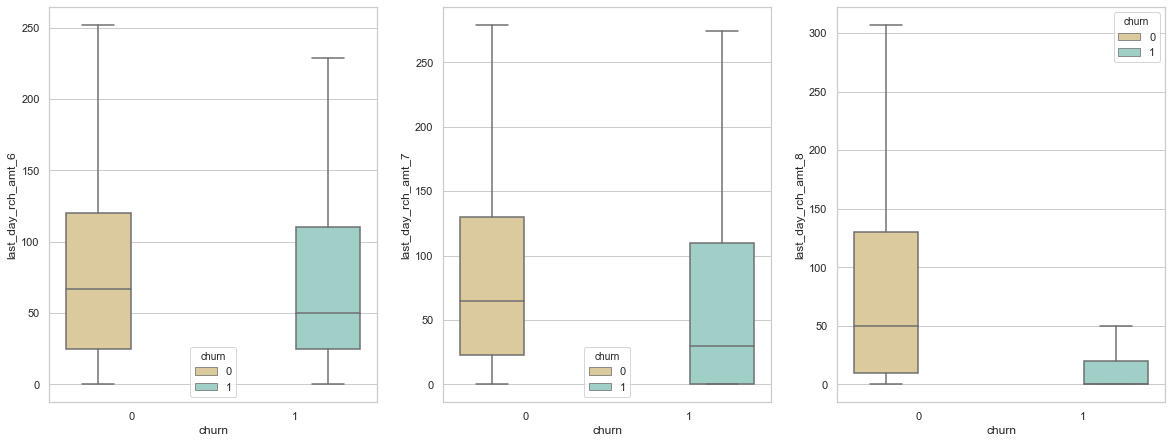

In [43]:
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

We are getting a huge drop in 8th month recharge amount for churned customers.

#### b. Analysis of 2G and 3G usage related attributes

In [44]:
usage_2g_and_3g = telecomdata_high_val_cust.columns[telecomdata_high_val_cust.columns.str.contains('2g|3g',regex=True)]

#let us check the % of NA values present
percentage_3g_2g_null_check = 100*telecomdata_high_val_cust.loc[:,usage_2g_and_3g].isnull().sum()/len(telecomdata_high_val_cust.loc[:,usage_2g_and_3g])
df = pd.DataFrame(percentage_3g_2g_null_check)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage)
display(df)

,Null_Percentage
count_rech_2g_6,44.15
count_rech_2g_7,43.15
count_rech_2g_8,46.83
count_rech_3g_6,44.15
count_rech_3g_7,43.15
count_rech_3g_8,46.83
vol_2g_mb_6,0.00
vol_2g_mb_7,0.00
vol_2g_mb_8,0.00
vol_3g_mb_6,0.00


Here We are getting more then 40% values are not available for count of recharge and average revenue for 2G/3G per user. Although we have 2G/3G volume usage based data available, we can drop these columns.

In [45]:
telecomdata_high_val_cust.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

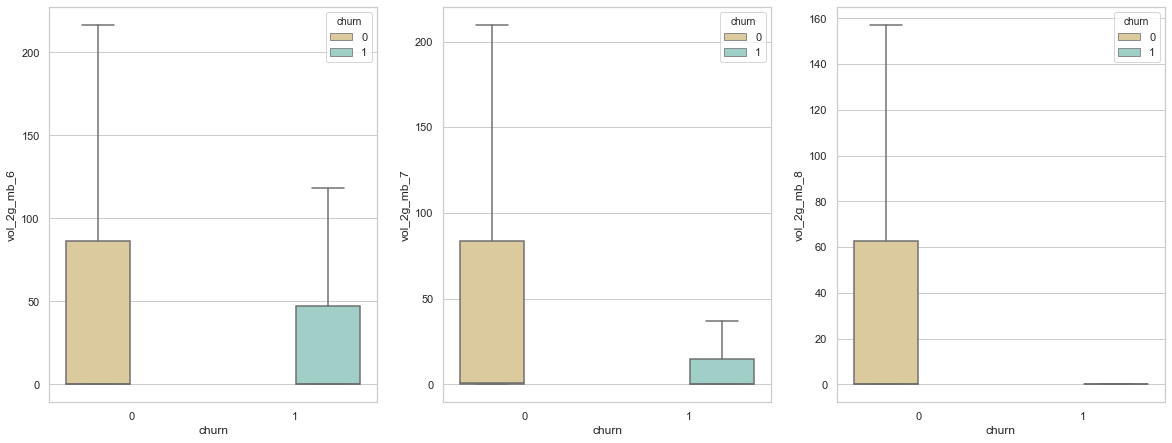

In [46]:
# Ploting for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')

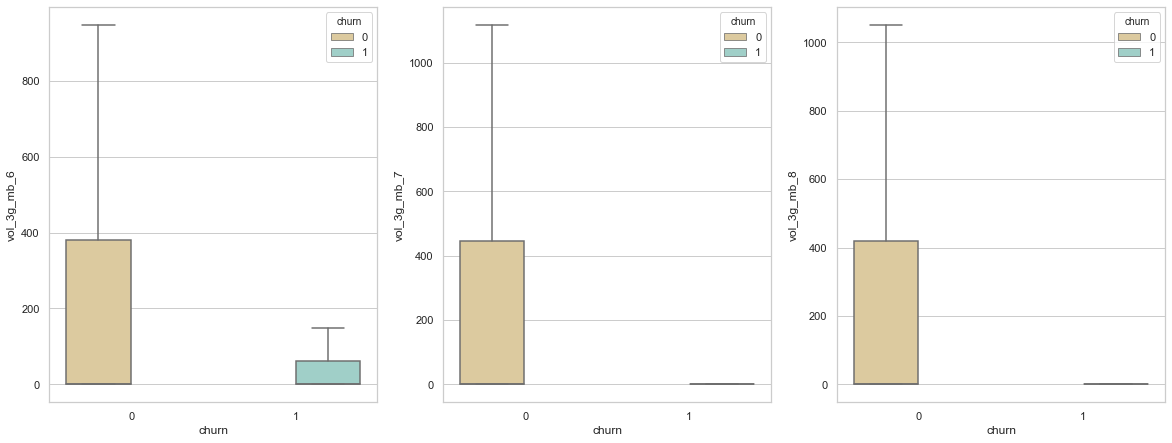

In [47]:
plot_box_chart('vol_3g_mb')

We have two observations from above:
  
  
  1) 2G and 3G usage for churned customers drops in 8th month
  2) We also see that 2G/3G usage is higher for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available.

**Analysis of monthly 2g/3g attributes**

In [48]:
# let's check monthly 2G/3G service schemes
monthly_subcription_2g_3g = telecomdata_high_val_cust.columns[telecomdata_high_val_cust.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [49]:
#Checking Null value
100*telecomdata_high_val_cust.loc[:,monthly_subcription_2g_3g].isnull().sum()/len(telecomdata_high_val_cust.loc[:,monthly_subcription_2g_3g])

monthly_2g_6                   0.00
monthly_2g_7                   0.00
monthly_2g_8                   0.00
monthly_3g_6                   0.00
monthly_3g_7                   0.00
monthly_3g_8                   0.00
dtype: float64

In [50]:
telecomdata_high_val_cust[monthly_subcription_2g_3g].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 6 columns):
monthly_2g_6    30001 non-null int64
monthly_2g_7    30001 non-null int64
monthly_2g_8    30001 non-null int64
monthly_3g_6    30001 non-null int64
monthly_3g_7    30001 non-null int64
monthly_3g_8    30001 non-null int64
dtypes: int64(6)
memory usage: 2.9 MB


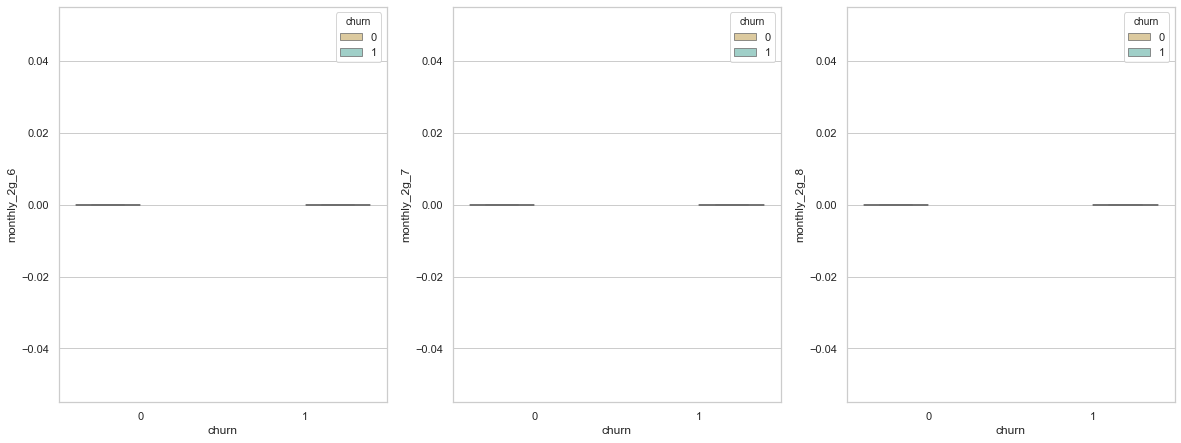

In [51]:
# Ploting for monthly subscription :
plot_box_chart('monthly_2g')

Value range is very low, hence graph is not giving us proper justification result .Hence doing analysis by checking mean value.

In [52]:
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar


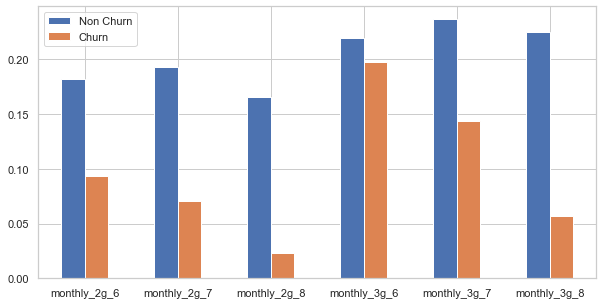

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.18,0.19,0.17,0.22,0.24,0.22
Churn,0.09,0.07,0.02,0.20,0.14,0.06


In [53]:
plot_mean_bar_chart(telecomdata_high_val_cust, monthly_subcription_2g_3g)

Observation:
    Drop of churn seen for 8th month

#### c. Analysis of volume bases cost attributes

In [54]:
# let's check Volume based cost 
vbc_column = telecomdata_high_val_cust.columns[telecomdata_high_val_cust.columns.str.contains('vbc_',regex=True)]
vbc_column.tolist()

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [55]:
# Renaming month named vbc columns to 6,7,8,9 format
telecomdata_high_val_cust.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
telecomdata_high_val_cust.drop('vbc_3g_9',axis=1,inplace=True)

In [56]:
vbc_column = telecomdata_high_val_cust.columns[telecomdata_high_val_cust.columns.str.contains('vbc_3g',regex=True)]
vbc_column.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

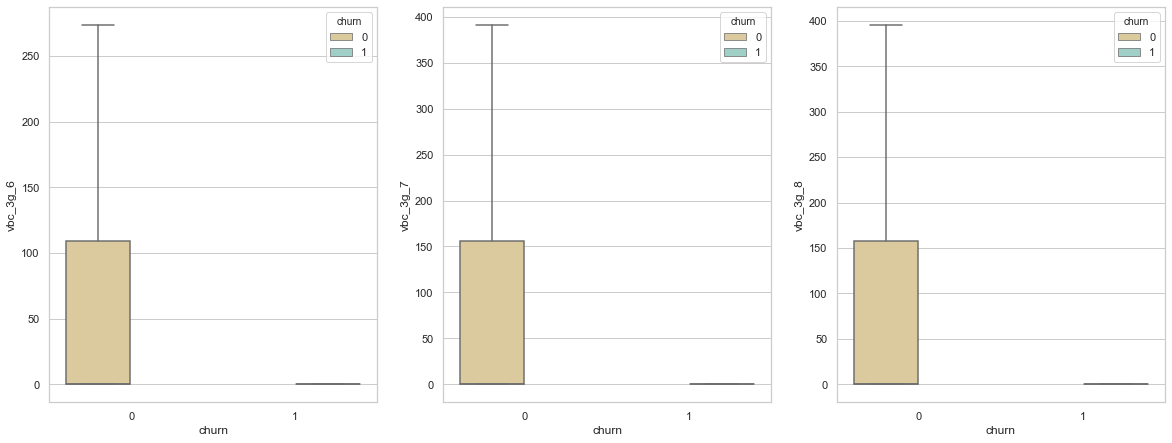

In [57]:
# Ploting for volume based cost :
plot_box_chart('vbc_3g')

Observation : No churn is seen in 6th, 7th & 8th months

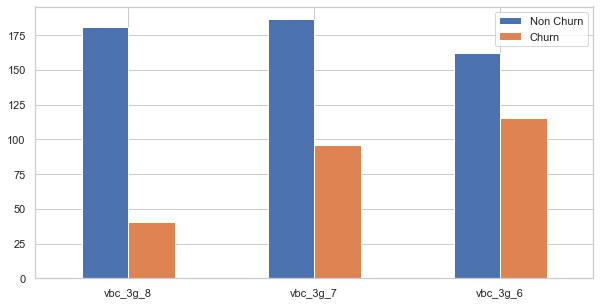

,vbc_3g_8,vbc_3g_7,vbc_3g_6
Non Churn,180.50,186.21,162.37
Churn,40.85,96.08,115.10


In [58]:
plot_mean_bar_chart(telecomdata_high_val_cust, vbc_column)

Volume based churn is realtively low for churned customers as compared to non-churn customers

In [59]:
# Checking Service schemes with validity smaller than a month for 2G/3G
SC_2g_or_3g_col = telecomdata_high_val_cust.columns[telecomdata_high_val_cust.
                                                    columns.str.contains('sachet_2g|sachet_3g',regex=True)]

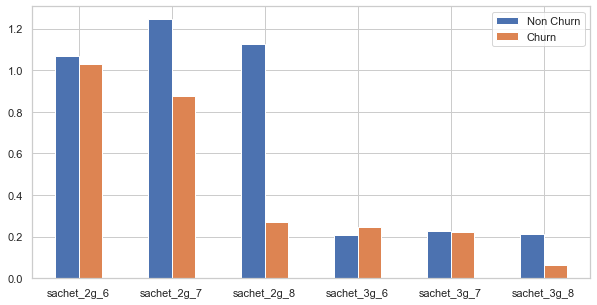

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,1.07,1.24,1.12,0.21,0.23,0.21
Churn,1.03,0.88,0.27,0.24,0.22,0.07


In [60]:
plot_mean_bar_chart(telecomdata_high_val_cust, SC_2g_or_3g_col)

A drop in churn rate is seen for 8th month

#### d. Average Revenue Per User

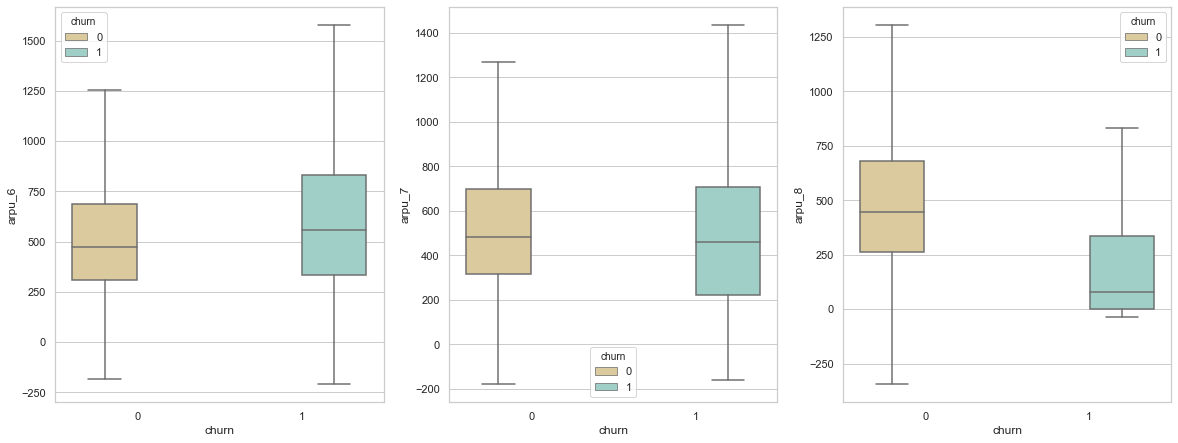

In [61]:
# Checking columns for average revenue per user
arpu_cols = telecomdata_high_val_cust.columns[telecomdata_high_val_cust.columns.str.contains('arpu_')]

# Plotting arpu
plot_box_chart('arpu')

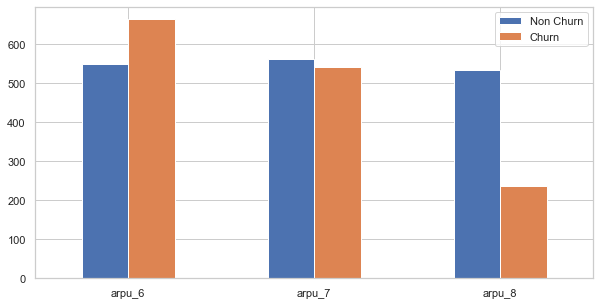

,arpu_6,arpu_7,arpu_8
Non Churn,549.22,562.61,532.64
Churn,663.16,540.17,237.20


In [62]:
plot_mean_bar_chart(telecomdata_high_val_cust, arpu_cols)

We can see that huge drops for Arpu in 8th month for churned customers

#### e.  Analysis of  mou attributes(Minutes of usage) - voice calls

In [63]:
mou_cols = telecomdata_high_val_cust.columns[telecomdata_high_val_cust.columns.str.contains('mou')]

In [64]:
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [65]:
100*telecomdata_high_val_cust.loc[:,mou_cols].isnull().sum()/len(telecomdata_high_val_cust)

onnet_mou_6                        1.82
onnet_mou_7                        1.79
onnet_mou_8                        3.91
offnet_mou_6                       1.82
offnet_mou_7                       1.79
offnet_mou_8                       3.91
roam_ic_mou_6                      1.82
roam_ic_mou_7                      1.79
roam_ic_mou_8                      3.91
roam_og_mou_6                      1.82
roam_og_mou_7                      1.79
roam_og_mou_8                      3.91
loc_og_t2t_mou_6                   1.82
loc_og_t2t_mou_7                   1.79
loc_og_t2t_mou_8                   3.91
loc_og_t2m_mou_6                   1.82
loc_og_t2m_mou_7                   1.79
loc_og_t2m_mou_8                   3.91
loc_og_t2f_mou_6                   1.82
loc_og_t2f_mou_7                   1.79
loc_og_t2f_mou_8                   3.91
loc_og_t2c_mou_6                   1.82
loc_og_t2c_mou_7                   1.79
loc_og_t2c_mou_8                   3.91
loc_og_mou_6                       1.82


In [66]:
telecomdata_high_val_cust.loc[:,mou_cols].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
count,"29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","30,001.00","30,001.00","30,001.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00","30,001.00","30,001.00","30,001.00","29,456.00","29,464.00","28,827.00","29,456.00","29,464.00","28,827.00"
mean,265.62,272.70,243.65,380.61,384.99,348.72,16.41,12.87,13.01,27.06,20.52,20.67,86.05,87.24,81.26,166.26,165.98,157.94,6.46,6.54,6.13,1.60,1.92,1.78,258.78,259.77,245.33,168.95,177.41,154.49,182.75,191.35,163.76,1.84,1.86,1.65,353.55,370.62,319.90,2.21,2.14,2.03,5.93,7.24,6.82,609.87,628.37,551.68,66.66,67.85,65.17,153.20,154.39,152.19,15.56,16.33,14.99,235.43,238.58,232.36,15.17,15.70,14.48,29.74,31.38,29.06,2.75,2.85,2.67,47.66,49.94,46.21,289.95,296.76,279.92,0.06,0.02,0.03,10.98,12.09,11.45
std,462.49,482.97,465.20,484.26,500.81,486.92,76.97,76.45,75.58,117.22,96.93,106.75,230.61,242.43,231.40,251.42,242.75,236.32,22.31,22.13,19.86,6.36,9.24,7.35,380.23,377.23,367.51,406.91,424.35,404.43,412.06,436.82,416.09,12.09,13.10,11.15,612.38,643.70,618.02,46.27,45.96,45.61,17.71,21.96,20.68,690.87,717.22,700.48,165.00,168.68,161.60,220.25,219.25,217.14,46.13,49.56,44.08,316.13,317.26,311.15,78.38,83.77,72.72,99.03,106.54,105.27,19.27,19.69,20.29,138.62,149.36,141.32,365.52,373.75,361.18,0.19,0.18,0.11,77.42,80.89,71.99
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.24,18.16,14.25,78.58,76.04,58.67,0.00,0.00,0.00,0.00,0.00,0.00,5.03,5.28,3.83,21.14,22.91,17.53,0.00,0.00,0.00,0.00,0.00,0.00,35.99,37.74,29.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.71,0.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,116.58,116.49,72.36,6.83,7.56,6.38,30.59,33.34,29.54,0.00,0.00,0.00,51.34,56.34,48.66,0.00,0.00,0.00,0.00,0.00,0.0

In [67]:
# replaceing null values by 0 for minutes of usage variables
telecomdata_high_val_cust.loc[:,mou_cols] = telecomdata_high_val_cust.loc[:,mou_cols].replace(np.NaN,0)

**Checking Outgoing mou variables**

In [68]:
mou_og_cols6 = telecomdata_high_val_cust.columns[telecomdata_high_val_cust.columns.str.
                                                contains('.*_og_.*mou_6',regex=True)]

In [69]:
telecomdata_high_val_cust.loc[:,mou_og_cols6].describe()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
count,"30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00"
mean,26.57,84.48,163.24,6.34,1.58,254.08,165.89,179.43,1.80,347.13,2.17,5.82,609.87
std,116.21,228.79,250.12,22.12,6.30,378.34,403.83,409.03,11.98,608.63,45.85,17.57,690.87
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,4.38,19.21,0.00,0.00,32.26,0.00,0.00,0.00,0.38,0.00,0.00,116.58
50%,0.00,24.33,77.18,0.00,0.00,124.54,2.71,16.36,0.00,45.13,0.00,0.21,410.63
75%,0.00,77.98,208.93,4.23,0.00,332.09,109.61,154.54,0.00,465.39,0.00,5.21,858.76
max,"3,775.11","6,431.33","4,729.74","1,466.03",271.44,"10,643.38","7,366.58","8,314.76",628.56,"8,432.99","5,900.66","1,023.21","10,674.03"


In [70]:
# def heatmap(x,y,dataframe):
data1 = telecomdata_high_val_cust.filter(mou_og_cols6)

<Figure size 1296x864 with 0 Axes>

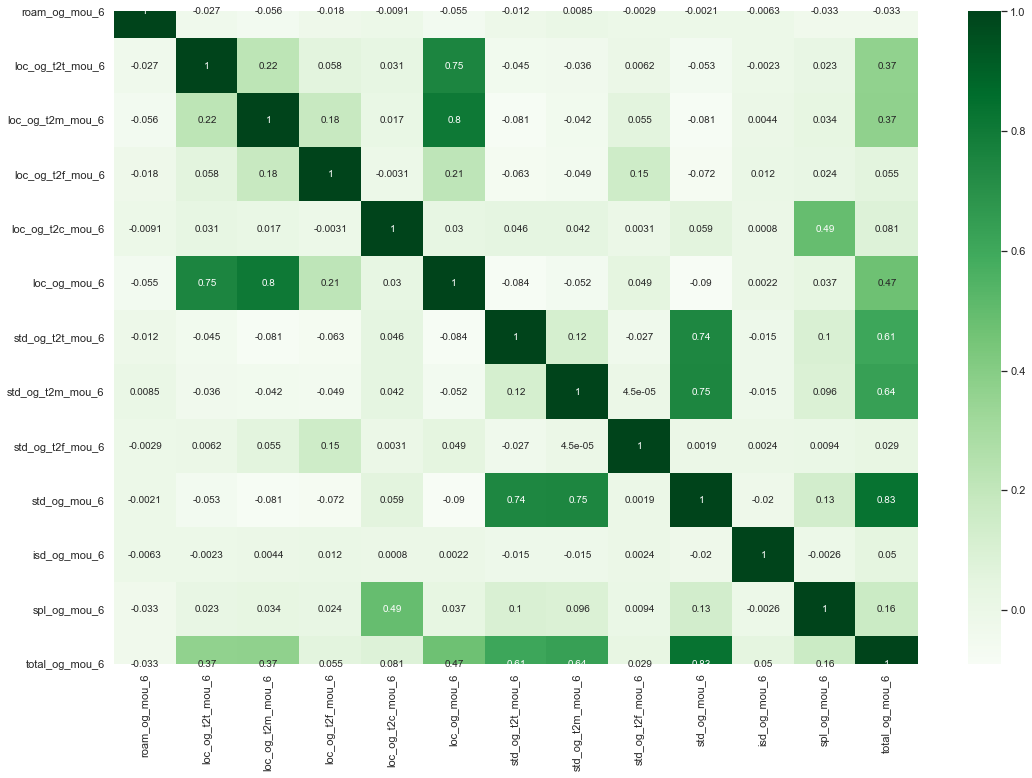

In [71]:
plt.figure(figsize=(18,12))
sns.heatmap(data1.corr(),cmap="Greens",annot=True)
plt.show()

    -We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 seems to have strong correlation with other fileds. So we need to drop these columns in order to get rid of multicollinearity issues

In [72]:
print(telecomdata_high_val_cust.loc[8,'total_og_mou_6'],
      "==",telecomdata_high_val_cust.loc
          [8,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())
print(telecomdata_high_val_cust.loc[8,'std_og_mou_6'],
      "==",telecomdata_high_val_cust.loc
          [8,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6','std_og_loc_mou_6']].sum())
print(telecomdata_high_val_cust.loc[8,'loc_og_mou_6'],
      "==",telecomdata_high_val_cust.loc
          [8,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_2tc_mou_6']].sum())

508.36 == 508.34999999999997
130.26 == 130.25
378.09 == 378.09


We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 are combination of other variables present in dataset.So we can remove these columns for all months from the data set.

In [73]:
list_total_og_cols = telecomdata_high_val_cust.columns[telecomdata_high_val_cust.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
telecomdata_high_val_cust.drop(list_total_og_cols,axis=1,inplace=True)
list_total_og_cols.tolist()

['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

**Checking for incoming mou variables**

In [74]:
mou_ic_cols6 = telecomdata_high_val_cust.columns[telecomdata_high_val_cust.columns.str.contains('.*_ic_.*mou_6',regex=True)]

In [75]:
telecomdata_high_val_cust.loc[:,mou_ic_cols6].describe()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
count,"30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00"
mean,16.11,65.45,150.41,15.28,231.15,14.89,29.20,2.70,46.79,289.95,0.06,10.78
std,76.30,163.74,219.20,45.75,314.82,77.70,98.21,19.10,137.50,365.52,0.19,76.73
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,6.09,28.08,0.00,47.88,0.00,0.00,0.00,1.03,72.88,0.00,0.00
50%,0.00,25.08,84.06,1.84,134.49,0.38,5.00,0.00,11.41,183.73,0.00,0.00
75%,0.00,67.43,188.71,11.98,297.14,8.20,23.60,0.11,41.49,371.99,0.00,0.00
max,"2,613.31","6,351.44","4,693.86","1,678.41","7,454.63","5,459.56","4,630.23","1,351.11","5,459.63","7,716.14",19.76,"6,789.41"


<Figure size 1296x864 with 0 Axes>

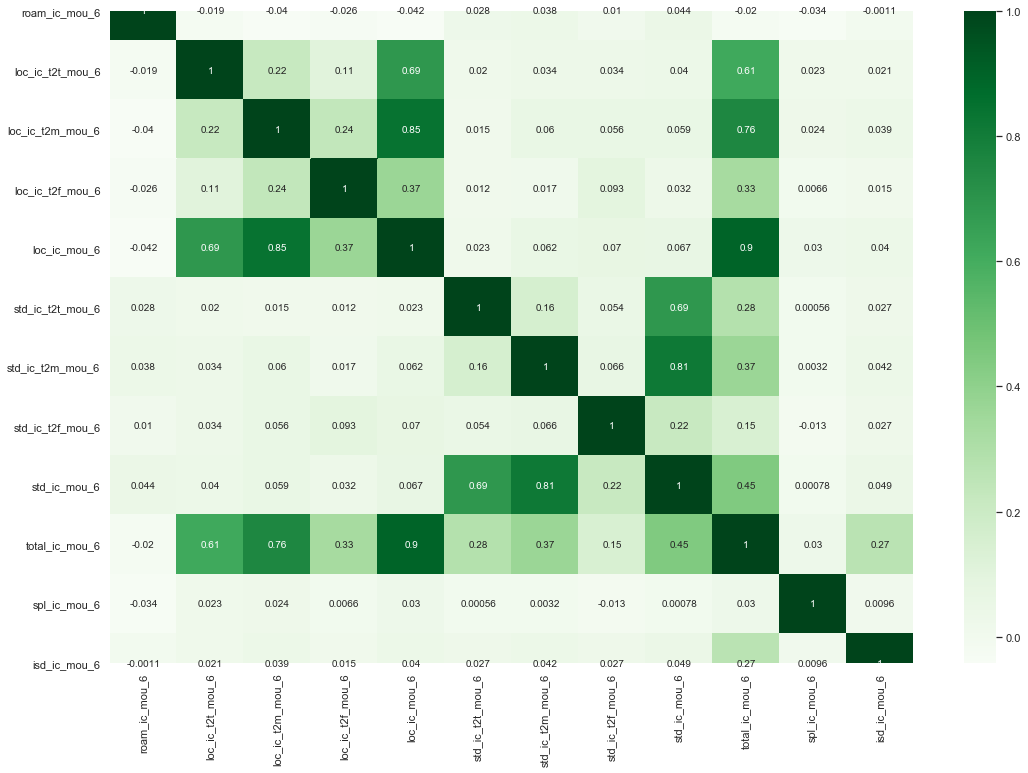

In [76]:
mou_data_ic = telecomdata_high_val_cust.filter(mou_ic_cols6)

plt.figure(figsize=(18,12))
sns.heatmap(mou_data_ic.corr(),cmap="Greens",annot=True)
plt.show()

We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 seems to have strong correlation with other fields.

In [77]:
print(telecomdata_high_val_cust.loc[21,'total_ic_mou_6'],"==",telecomdata_high_val_cust.loc[21,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())
print(telecomdata_high_val_cust.loc[21,'loc_ic_mou_6'],"==",telecomdata_high_val_cust.loc[21,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_t2c_mou_6']].sum())
print(telecomdata_high_val_cust.loc[21,'std_ic_mou_6'],"==",telecomdata_high_val_cust.loc[21,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2c_mou_6']].sum())

207.09 == 207.09
125.33 == 125.32000000000001
81.76 == 81.75


In [78]:
list_total_ic_cols = telecomdata_high_val_cust.columns[telecomdata_high_val_cust.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
telecomdata_high_val_cust.drop(list_total_ic_cols,axis=1,inplace=True)
list_total_ic_cols.tolist()

['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

#### f. Analysis of Offnet Usage

In [79]:
offnet_usage_service_col = telecomdata_high_val_cust.columns[telecomdata_high_val_cust.columns.str.contains('offnet.*mou',regex=True)]

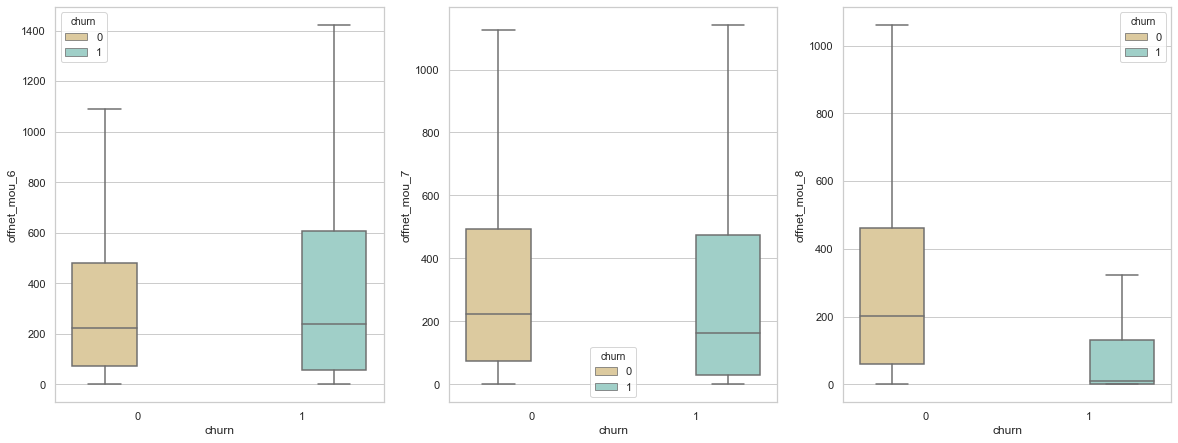

In [80]:
# Offnet mou values for churned and non churned customers
plot_box_chart('offnet_mou')

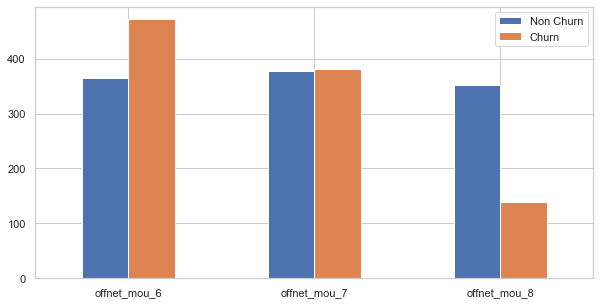

,offnet_mou_6,offnet_mou_7,offnet_mou_8
Non Churn,365.05,377.81,352.51
Churn,471.33,381.42,138.25


In [81]:
plot_mean_bar_chart(telecomdata_high_val_cust, offnet_usage_service_col)

#### g. Analysis of ONNET usage : All kind of calls within the same operator network

In [82]:
#minutes of usage related columns
onnet_usage_service =  telecomdata_high_val_cust.columns[telecomdata_high_val_cust.columns.str.contains('^onnet.*mou',regex=True)]

In [83]:
onnet_usage_service

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], dtype='object')

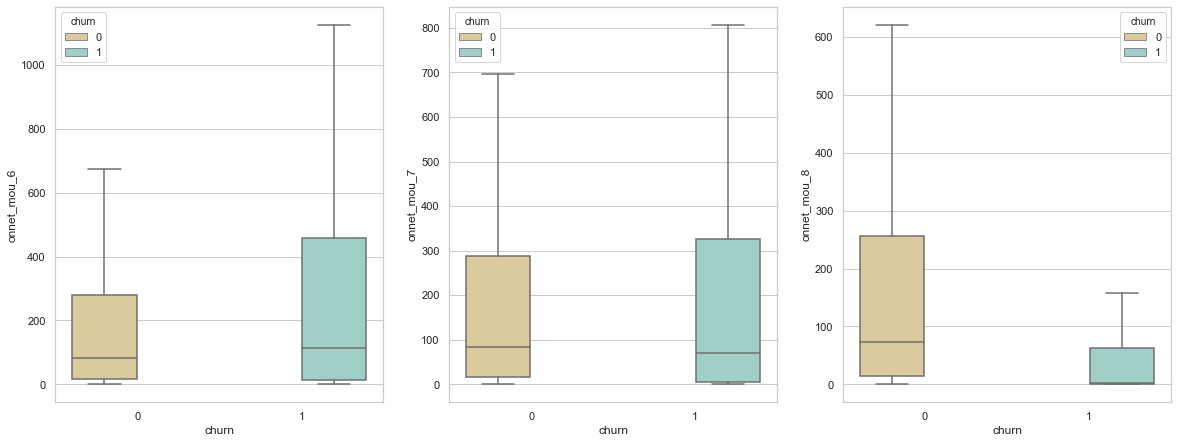

In [84]:
plot_box_chart('onnet_mou')

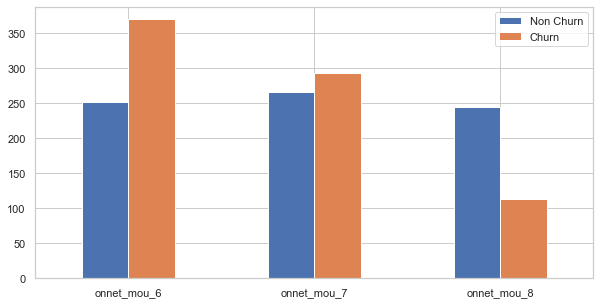

,onnet_mou_6,onnet_mou_7,onnet_mou_8
Non Churn,251.20,265.64,244.82
Churn,369.06,292.41,113.23


In [85]:
plot_mean_bar_chart(telecomdata_high_val_cust, onnet_usage_service)

#### h. Tenure Analysis for Customers

In [86]:
tenure_data = telecomdata_high_val_cust.copy()

<Figure size 1008x576 with 0 Axes>

0                   32.27
7                   26.73
8                   10.50
21                  24.00
23                  20.13
Name: tenure, dtype: float64

Text(0, 0.5, 'Number of Customers')

Text(0.5, 0, 'Tenure in Months')

Text(0.5, 1.0, 'Customers Vs Tenure')

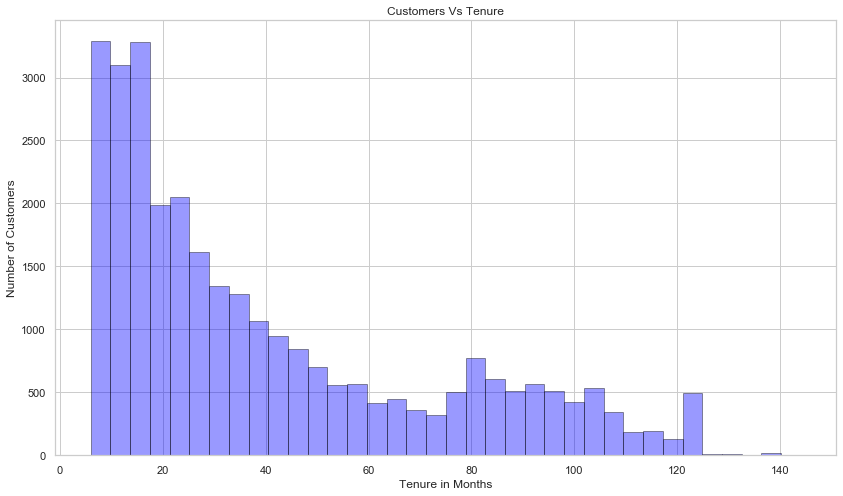

In [87]:
plt.figure(figsize=(14,8))
# aon --> Age on network - number of days the customer is using the operator T network
tenure_data['tenure'] = tenure_data['aon']/30
tenure_data['tenure'].head()
ax = sns.distplot(tenure_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()

In [88]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)
tenure_data['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

<Figure size 720x576 with 0 Axes>

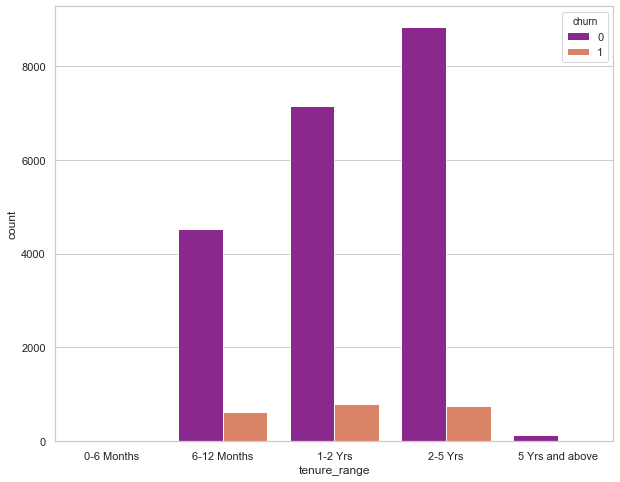

In [89]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("plasma"))
plt.show()

In [90]:
telecomdata_high_val_cust.shape

(30001, 126)

### MISSING VALUE TREATMENTS:  Checking Columns with Null Values more than 30%

In [91]:
missing_matrix1 =pd.DataFrame({'Null_Percentage': telecomdata_high_val_cust.isnull().sum()/len(telecomdata_high_val_cust) * 100})
# metadata_matrix['Null_Percentage']

meta_df = missing_matrix1[missing_matrix1["Null_Percentage"] > 30]
meta_df.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
meta_df[col_to_display]

,Null_Percentage
night_pck_user_8,46.83
fb_user_8,46.83
night_pck_user_6,44.15
fb_user_6,44.15
night_pck_user_7,43.15
fb_user_7,43.15


In [92]:
#Dropping 30% column
is_more_30 = meta_df.index
telecomdata_high_val_cust.drop(telecomdata_high_val_cust[is_more_30],axis=1,inplace=True)

In [93]:
telecomdata_high_val_cust.shape

(30001, 120)

### Replacing NaN values

In [94]:
missing_matrix2 =pd.DataFrame({'Null_Percentage': telecomdata_high_val_cust.isnull().sum()/len(telecomdata_high_val_cust) * 100})
# metadata_matrix['Null_Percentage']

meta_df1 = missing_matrix2[missing_matrix2["Null_Percentage"] > 0]
meta_df1.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
meta_df1[col_to_display]

,Null_Percentage
og_others_8,3.91
ic_others_8,3.91
og_others_6,1.82
ic_others_6,1.82
og_others_7,1.79
ic_others_7,1.79


In [95]:
telecomdata_high_val_cust[meta_df1.index].head(3)

,og_others_8,ic_others_8,og_others_6,ic_others_6,og_others_7,ic_others_7
0,0.00,0.00,nan,nan,nan,nan
7,0.00,15.14,0.00,15.74,0.00,15.19
8,0.00,0.00,0.00,0.00,0.00,0.00


**Exploring/Imputing Numeric field**

In [96]:
num_col = ['og_others_8', 'ic_others_8', 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']

Replacing NaN values with zero for all numeric data as most of the data is clean and will not impact the analysis

In [97]:
for i in num_col:
    telecomdata_high_val_cust.loc[telecomdata_high_val_cust[i].isnull(),i]=0

In [98]:
telecomdata_high_val_cust[meta_df1.index].head(3)

,og_others_8,ic_others_8,og_others_6,ic_others_6,og_others_7,ic_others_7
0,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,15.14,0.00,15.74,0.00,15.19
8,0.00,0.00,0.00,0.00,0.00,0.00


In [99]:
#final check of missing percentage
missing_matrix3 =pd.DataFrame({'Null_Percentage': telecomdata_high_val_cust.isnull().sum()/len(telecomdata_high_val_cust) * 100})
meta_df2 = missing_matrix3[missing_matrix3["Null_Percentage"] > 0]
meta_df2.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
meta_df2[col_to_display]

,Null_Percentage


So now we can say our dataset is clean. 
All missing values have been imputed and dropped as necessary

In [100]:
#creating copy of dataset
telecom_df_final = telecomdata_high_val_cust.copy()
print(telecom_df_final.shape)
telecom_df_final.head(3)

(30001, 120)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
0,197.38,214.82,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.00,1.00,1.00,252.00,252.00,252.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,252.00,252.00,252.00,559.00,1
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.00,0.00,"1,185.00",1
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,354.00,207.00,696.00,0


In [101]:
#Dropping the total_avg_rech_amnt_6_7_GPhase column 
telecom_df_final.drop(["total_avg_rech_amnt_6_7_GPhase"],axis=1,inplace=True)
print (telecom_df_final.shape)

(30001, 119)


In [102]:
col_list = telecom_df_final.filter(regex='_6|_7').columns.str[:-2]

In [103]:
col_list

Index(['arpu', 'arpu', 'onnet_mou', 'onnet_mou', 'offnet_mou', 'offnet_mou',
       'roam_ic_mou', 'roam_ic_mou', 'roam_og_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2m_mou',
       'loc_og_t2f_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_t2c_mou',
       'std_og_t2t_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2m_mou',
       'std_og_t2f_mou', 'std_og_t2f_mou', 'isd_og_mou', 'isd_og_mou',
       'spl_og_mou', 'spl_og_mou', 'og_others', 'og_others', 'loc_ic_t2t_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou',
       'loc_ic_t2f_mou', 'std_ic_t2t_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou',
       'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2f_mou', 'spl_ic_mou',
       'spl_ic_mou', 'isd_ic_mou', 'isd_ic_mou', 'ic_others', 'ic_others',
       'total_rech_num', 'total_rech_num', 'total_rech_amt', 'total_rech_amt',
       'max_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'last_day_rch_amt',
   

In [104]:
len(col_list)

78

In [105]:
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecom_df_final[avg_col_name] = (telecom_df_final[col_6]  + telecom_df_final[col_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
total_rech_amt_data


In [106]:
col_list_to_drop = telecom_df_final.filter(regex='_6|_7')

In [107]:
col_list_to_drop.shape

(30001, 78)

In [108]:
len(col_list_to_drop)

30001

In [109]:
telecom_df_final.drop(col_list_to_drop,axis=1,inplace=True)
print (telecom_df_final.shape)

(30001, 80)


In [110]:
telecom_df_final.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,4.13,1.15,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,1.00,252.00,252.00,5.75,109.61,0,0,1,0,968,30.40,252.00,1,206.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.50,307.00,252.00,252.00,1.00,252.00,252.00,15.72,117.16,0.00,0.00,1.00,0.00,50.60,252.00
7,"3,171.48",52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,6.50,0.00,27.31,121.19,39.53,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,0.00,1,"1,209.51",56.26,510.29,24.86,18.16,41.38,378.00,58.64,0.00,13.79,40.83,13.37,0.09,2.25,0.00,45.20,219.53,126.81,24.36,109.22,43.22,0.10,8.29,15.46,5.00,"1,185.00","1,185.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06,0.00
8,137.36,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,75.69,0.00,0.00,10.23,0.00,0.31,15.48,0.00,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,3.00,23.00,69.00,0.03,11.94,0,3,0,0,315,21.03,207.00,0,435.47,382.36,87.64,0.00,0.00,257.36,75.77,0.00,0.00,125.00,11.86,0.00,0.00,0.00,0.00,16.84,35.78,0.00,0.29,13.25,0.00,0.00,0.00,0.00,20.00,519.00,122.00,25.00,1.00,77.00,88.50,178.00,375.48,0.50,0.50,0.00,0.00,516.40,177.00
21,637.76,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,61.79,876.99,0.00,0.00,0.00,0.00,19.54,129.16,10.39,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0,0,0,0,720,0.00,0.00,0,556.10,117.26,827.30,0.00,0.00,5.32,89.87,0.38,0.00,111.94,737.05,0.00,0.00,0.00,0.00,6.33,96.43,3.73,10.02,52.96,0.00,0.00,0.00,0.00,24.00,640.00,50.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
23,366.97,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,0.00,39.61,0.00,0.00,17.71,0.00,76.64,146.84,0.71,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,2.00,179.00,270.00,0.01,"1,009.92",0,0,1,1,604,40.45,540.00,0,134.12,49.81,87.38,0.00,0.00,49.81,82.97,0.00,0.00,0.00,4.35,0.00,0.01,0.05,0.00,40.88,104.63,0.00,0.26,8.66,0.00,0.00,14.12,2.67,4.00,227.00,89.50,89.50,1.00,89.50,178.00,0.24,299.55,0.00,0.00,1.00,0.00,25.93,356.00


## MODELLING

In [111]:
telecom_pca_df = telecom_df_final.copy()
telecom_pca_df.shape

(30001, 80)

In [112]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.pipeline import Pipeline

In [113]:
Y = telecom_pca_df["churn"]

In [114]:
X = telecom_pca_df.drop(["churn"],axis=1)

In [115]:
X.shape

(30001, 79)

In [116]:
Y.shape

(30001,)

**Scaling to Normalise**

In [117]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_std, columns=X.columns)

**Train Test Split**

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, train_size=0.7, random_state=1)

In [119]:
X_train.shape
X_test.shape
Y_train.shape
Y_test.shape

(21000, 79)

(9001, 79)

(21000,)

(9001,)

### PCA : Principal Component Analysis

-Dimensionality Reduction is done using PCA

PCA(random_state=101, svd_solver='randomized')

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

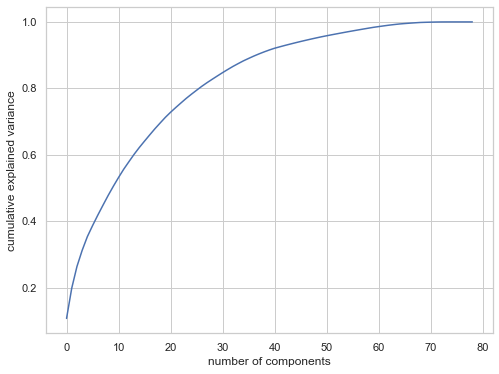

In [120]:
# scree plot
pca = PCA(svd_solver='randomized', random_state=101)
pca.fit(X_train)
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We can see here 90% variance can be explained by 60 components

In [121]:
pca.components_

array([[ 2.35796448e-03, -1.10403017e-01, -1.05648942e-01, ...,
         9.86020412e-02,  2.15877384e-01,  2.16597496e-01],
       [ 2.59963063e-01,  1.17616626e-01,  2.13186321e-01, ...,
        -6.03149263e-02,  7.31229949e-02, -5.06438020e-02],
       [ 1.54940637e-01,  1.68479048e-01,  1.48120119e-01, ...,
         1.66067933e-01, -1.84991330e-02,  1.96796333e-01],
       ...,
       [ 1.54571633e-03,  3.15549096e-01,  3.20331722e-01, ...,
         9.39609319e-05,  9.40302188e-05,  1.19373680e-05],
       [ 6.91927232e-16, -2.46534303e-15, -2.37549755e-15, ...,
         2.17427260e-01, -1.08176323e-16,  2.98658949e-16],
       [ 0.00000000e+00, -2.65174942e-15, -1.85792324e-15, ...,
        -1.20693818e-01, -2.69503035e-16, -1.48242930e-17]])

In [122]:
col = list(X_train.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.00,0.26,0.15,arpu_8
1,-0.11,0.12,0.17,onnet_mou_8
2,-0.11,0.21,0.15,offnet_mou_8
3,-0.01,0.05,0.01,roam_ic_mou_8
4,-0.02,0.07,0.04,roam_og_mou_8
5,-0.03,0.11,0.04,loc_og_t2t_mou_8
6,-0.03,0.20,-0.00,loc_og_t2m_mou_8
7,0.01,0.13,-0.08,loc_og_t2f_mou_8
8,-0.01,0.01,0.08,loc_og_t2c_mou_8
9,-0.11,0.07,0.16,std_og_t2t_mou_8


In [123]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 10.69,  19.81,  26.32,  31.18,  35.32,  38.64,  41.78,  44.78,
        47.73,  50.51,  53.15,  55.66,  57.93,  60.16,  62.21,  64.12,
        66.  ,  67.85,  69.58,  71.28,  72.81,  74.24,  75.62,  76.98,
        78.23,  79.43,  80.62,  81.71,  82.74,  83.75,  84.74,  85.69,
        86.61,  87.46,  88.28,  89.01,  89.72,  90.38,  90.99,  91.56,
        92.08,  92.51,  92.93,  93.33,  93.72,  94.1 ,  94.47,  94.83,
        95.18,  95.52,  95.83,  96.14,  96.44,  96.73,  97.02,  97.3 ,
        97.58,  97.85,  98.12,  98.38,  98.6 ,  98.82,  99.03,  99.22,
        99.39,  99.52,  99.64,  99.75,  99.85,  99.9 ,  99.94,  99.98,
       100.  , 100.01, 100.01, 100.01, 100.01, 100.01, 100.01])

In [124]:
#Import incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

In [125]:
#Fit the train data
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 60)

In [126]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [127]:
corrmat.shape

(60, 60)

<Figure size 2160x1440 with 0 Axes>

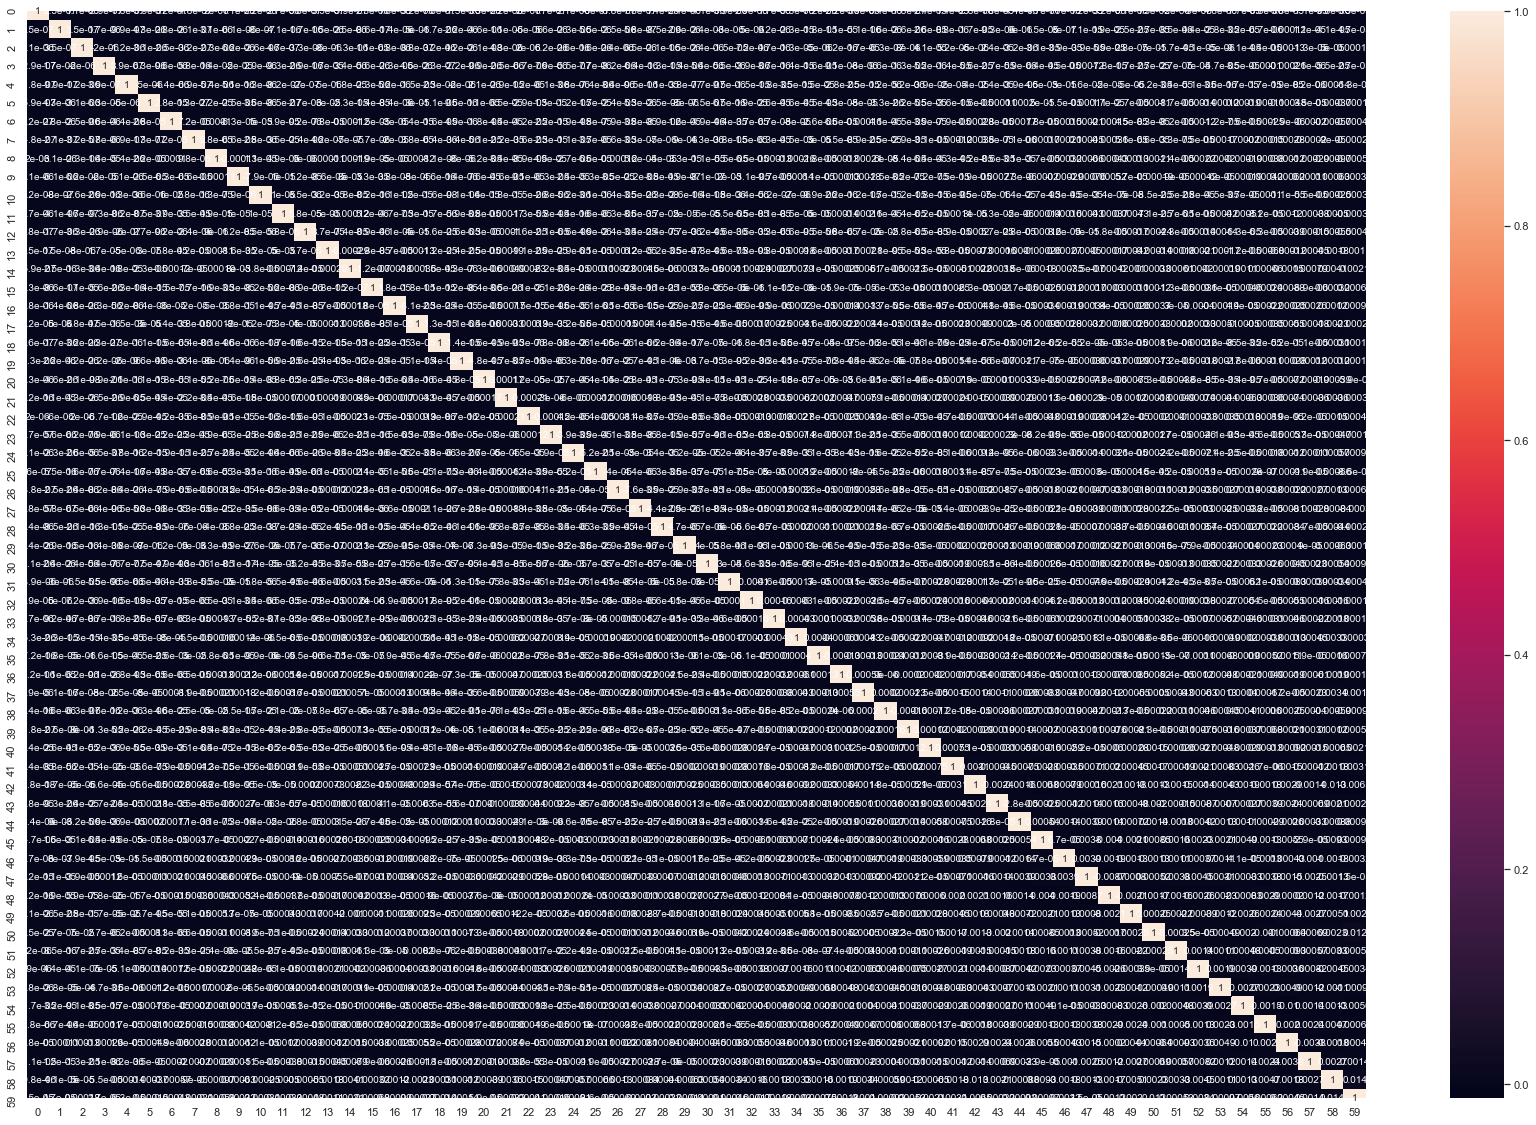

In [128]:
%matplotlib inline
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(corrmat,annot = True)

In [129]:
#Fit the train data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 60)

###  LOGISTIC REGRESSION WITH PCA 

In [130]:
learner_pca = LogisticRegression()

In [131]:
model_pca = learner_pca.fit(df_train_pca,Y_train)

**Making Predictions**

In [132]:
preds_prob_test = learner_pca.predict_proba(df_test_pca)

In [133]:
roc_auc_score(Y_test, preds_prob_test[:,1])

0.8834463627607835

In [134]:
# predict churn on test data
y_pred = model_pca.predict(df_test_pca)

In [135]:
# create onfusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[8175   97]
 [ 557  172]]


In [136]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.24
Specificity: 	0.99


In [137]:
print('accuracy_score : ',accuracy_score(Y_test,y_pred))

accuracy_score :  0.9273414065103878


### Hyperparameter tuning - PCA and Logistic Regression

In [138]:
# class imbalance
Y_train.value_counts()/Y_train.shape

0                   0.92
1                   0.08
Name: churn, dtype: float64

In [139]:
#PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, 
                     cv=folds,
                     param_grid=params, 
                     scoring='roc_auc', n_jobs=-1, verbose=1)

In [140]:
# fit model
model.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   23.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [141]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.99,0.16,0.00,0.00,0.10,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",nan,nan,nan,nan,nan,nan,nan,11
1,0.61,0.20,0.00,0.00,0.10,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",nan,nan,nan,nan,nan,nan,nan,30
2,2.71,0.29,0.11,0.03,0.10,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.90,0.87,0.90,0.89,0.90,0.89,0.01,8
3,0.26,0.09,0.00,0.00,0.10,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",nan,nan,nan,nan,nan,nan,nan,29
4,1.89,0.09,0.00,0.00,0.50,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",nan,nan,nan,nan,nan,nan,nan,28
5,0.29,0.12,0.00,0.00,0.50,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",nan,nan,nan,nan,nan,nan,nan,27
6,3.00,0.04,0.06,0.01,0.50,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.90,0.88,0.91,0.89,0.90,0.89,0.01,7
7,0.34,0.03,0.00,0.00,0.50,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",nan,nan,nan,nan,nan,nan,nan,26
8,1.87,0.03,0.00,0.00,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",nan,nan,nan,nan,nan,nan,nan,25
9,0.36,0.03,0.00,0.00,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",nan,nan,nan,nan,nan,nan,nan,24


In [142]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8948157658425734
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 60}


In [143]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

[[6918 1354]
 [ 139  590]]
Sensitivity: 	0.81
Specificity: 	0.84


In [144]:
print('accuracy_score : ',accuracy_score(Y_test,y_pred))

accuracy_score :  0.8341295411620931


#### Creating new Grid search Object with optimal parameters

In [145]:
#PCA
pca_final = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
new_logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca_final),
         ("logistic", new_logistic)
        ]

# compile pipeline
pca_logistic_final = Pipeline(steps)

# hyperparameter space
params_optimal = {'pca__n_components': [60], 'logistic__C': [10], 'logistic__penalty': ['l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
final_model = GridSearchCV(estimator=pca_logistic, 
                     cv=folds,
                     param_grid=params_optimal, 
                     scoring='roc_auc', n_jobs=-1, verbose=1)

In [146]:
# fit model
final_model.fit(X_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [10], 'logistic__penalty': ['l2'],
                         'pca__n_components': [60]},
             scoring='roc_auc', verbose=1)

In [147]:
# cross validation results
pd.DataFrame(final_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.20,0.03,0.02,0.00,10,l2,60,"{'logistic__C': 10, 'logistic__penalty': 'l2',...",0.90,0.88,0.91,0.89,0.90,0.89,0.01,1


In [148]:
# print best hyperparameters
print("Best AUC: ", final_model.best_score_)
print("Best hyperparameters: ", final_model.best_params_)

Best AUC:  0.8948142516543529
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 60}


In [149]:
# predict churn on test data
y_pred = final_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

[[6918 1354]
 [ 139  590]]
Sensitivity: 	0.81
Specificity: 	0.84


MODEL BASED OBSERVATIONS:
The above model will only be able - to predict customers who will churn based on the below parameters
        
        -We get around 0.81 sensitivity score on the test data        
        -Also we get a specificity of 0.84.
        - Also we get an AUC score of 0.895.

## DECISION TREE CLASSIFIER (WITH PCA)

In [150]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

In [151]:
# Fxitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train_pca,Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [152]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(Y_test,y_pred_default))
print(confusion_matrix(Y_test,y_pred_default))
print('Acuracy Score', accuracy_score(Y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82      8272
           1       0.19      0.79      0.31       729

    accuracy                           0.72      9001
   macro avg       0.58      0.75      0.57      9001
weighted avg       0.91      0.72      0.78      9001

[[5878 2394]
 [ 153  576]]
Acuracy Score 0.7170314409510055


In [153]:

confusion_tree = confusion_matrix(Y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(Y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.7170314409510055
Sensitivity:  0.7901234567901234
Specificity:  0.7105899419729207
false postive rate:  0.2894100580270793
positive predictive value:  0.19393939393939394
Negative predictive value:  0.974631072790582
Misclassification Rate:  0.28296855904899454


We can see above Sensitivity of model so we decide to tune the Hyperparameter

#### Tuning max_depth

In [154]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)

tree.fit(df_train_pca,Y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [155]:
Y_train.shape

(21000,)

In [156]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.14,0.00,0.00,0.00,1,{'max_depth': 1},0.58,0.59,0.58,0.58,0.58,0.58,0.00,39,0.58,0.58,0.58,0.59,0.58,0.58,0.00
1,0.25,0.00,0.00,0.00,2,{'max_depth': 2},0.74,0.75,0.74,0.74,0.74,0.74,0.01,38,0.74,0.74,0.74,0.75,0.74,0.74,0.00
2,0.38,0.02,0.00,0.00,3,{'max_depth': 3},0.80,0.76,0.75,0.80,0.75,0.77,0.02,37,0.80,0.76,0.76,0.80,0.76,0.78,0.02
3,0.46,0.01,0.00,0.00,4,{'max_depth': 4},0.77,0.79,0.77,0.80,0.76,0.78,0.01,36,0.78,0.79,0.78,0.81,0.78,0.79,0.01
4,0.59,0.02,0.00,0.00,5,{'max_depth': 5},0.76,0.78,0.80,0.77,0.79,0.78,0.01,35,0.77,0.78,0.80,0.80,0.80,0.79,0.01


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Accuracy')

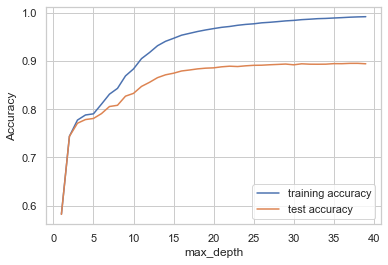

In [157]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Value for max_depth ranges betweeen 15 to 20

#### Tuning min_samples_leaf

In [158]:
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_train_pca,Y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [159]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.87,0.04,0.00,0.00,5,{'min_samples_leaf': 5},0.86,0.86,0.87,0.86,0.87,0.86,0.01,1,0.95,0.95,0.95,0.95,0.95,0.95,0.00
1,0.75,0.02,0.00,0.00,25,{'min_samples_leaf': 25},0.80,0.82,0.82,0.80,0.82,0.81,0.01,2,0.84,0.86,0.86,0.85,0.86,0.85,0.01
2,0.69,0.02,0.00,0.00,45,{'min_samples_leaf': 45},0.76,0.81,0.79,0.78,0.78,0.78,0.02,5,0.80,0.83,0.83,0.81,0.81,0.82,0.01
3,0.67,0.02,0.00,0.00,65,{'min_samples_leaf': 65},0.77,0.79,0.79,0.78,0.77,0.78,0.01,8,0.79,0.81,0.81,0.80,0.79,0.80,0.01
4,0.63,0.01,0.00,0.00,85,{'min_samples_leaf': 85},0.77,0.78,0.77,0.76,0.80,0.78,0.01,9,0.79,0.80,0.79,0.80,0.81,0.80,0.01


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_samples_leaf')

Text(0, 0.5, 'Accuracy')

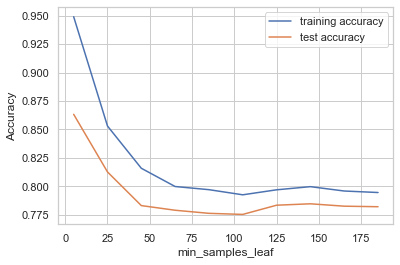

In [160]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The value for min_samples_leaf ranges between 5 to 150

#### Tuning min sample split

In [161]:
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_train_pca,Y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [162]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.99,0.05,0.00,0.00,5,{'min_samples_split': 5},0.89,0.89,0.90,0.89,0.89,0.89,0.01,1,1.00,1.00,0.99,0.99,0.99,0.99,0.00
1,0.94,0.03,0.00,0.00,25,{'min_samples_split': 25},0.85,0.85,0.86,0.85,0.86,0.85,0.00,2,0.94,0.94,0.94,0.94,0.94,0.94,0.00
2,0.93,0.03,0.00,0.00,45,{'min_samples_split': 45},0.82,0.83,0.84,0.83,0.83,0.83,0.01,3,0.89,0.90,0.90,0.90,0.90,0.90,0.00
3,0.91,0.03,0.00,0.00,65,{'min_samples_split': 65},0.80,0.82,0.83,0.81,0.81,0.81,0.01,4,0.86,0.89,0.88,0.87,0.88,0.88,0.01
4,0.89,0.03,0.00,0.00,85,{'min_samples_split': 85},0.79,0.81,0.81,0.80,0.79,0.80,0.01,5,0.84,0.87,0.86,0.85,0.84,0.85,0.01


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_samples_split')

Text(0, 0.5, 'Accuracy')

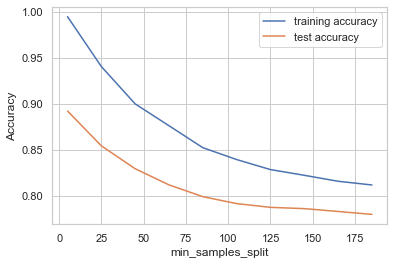

In [163]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Creating the parameter grid using hyperparameters

In [164]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,Y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  4.2min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 200, 20),
                         'min_samples_split': range(5, 200, 20)},
             refit='recall_score', verbose=1)

In [165]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.99,0.05,0.00,0.00,5,{'min_samples_split': 5},0.89,0.89,0.90,0.89,0.89,0.89,0.01,1,1.00,1.00,0.99,0.99,0.99,0.99,0.00
1,0.94,0.03,0.00,0.00,25,{'min_samples_split': 25},0.85,0.85,0.86,0.85,0.86,0.85,0.00,2,0.94,0.94,0.94,0.94,0.94,0.94,0.00
2,0.93,0.03,0.00,0.00,45,{'min_samples_split': 45},0.82,0.83,0.84,0.83,0.83,0.83,0.01,3,0.89,0.90,0.90,0.90,0.90,0.90,0.00
3,0.91,0.03,0.00,0.00,65,{'min_samples_split': 65},0.80,0.82,0.83,0.81,0.81,0.81,0.01,4,0.86,0.89,0.88,0.87,0.88,0.88,0.01
4,0.89,0.03,0.00,0.00,85,{'min_samples_split': 85},0.79,0.81,0.81,0.80,0.79,0.80,0.01,5,0.84,0.87,0.86,0.85,0.84,0.85,0.01


In [166]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8266666666666665
DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5)


In [167]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(df_train_pca,Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [168]:
y_pred_default = clf_gini.predict(df_test_pca)
confusion_tree_hyper=confusion_matrix(Y_test,y_pred_default)
confusion_tree_hyper

array([[6834, 1438],
       [ 222,  507]])

In [169]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

print('accuracy_score : ',accuracy_score(Y_test,y_pred_default))

Sensitivity:  0.6954732510288066
Specificity:  0.8261605415860735
false postive rate:  0.1738394584139265
positive predictive value:  0.26066838046272495
Negative predictive value:  0.9685374149659864
Misclassification Rate:  0.1844239528941229
accuracy_score :  0.8155760471058772


## RandomForestClassifier with PCA

In [170]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(df_train_pca,Y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

RandomForestClassifier(class_weight='balanced')

In [171]:
confusion_rf=confusion_matrix(Y_test,y_pred_default)
confusion_rf

array([[8188,   84],
       [ 600,  129]])

In [172]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

print('accuracy_score : ',accuracy_score(Y_test,y_pred_default))

Sensitivity:  0.17695473251028807
Specificity:  0.9898452611218569
false postive rate:  0.010154738878143133
positive predictive value:  0.6056338028169014
Negative predictive value:  0.9317250796540737
Misclassification Rate:  0.07599155649372293
accuracy_score :  0.9240084435062771


### Hyperparameter tuning for RandomForest

### Tuning max_depth

In [173]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')

# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf_with_pca.fit(df_train_pca, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [174]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.14,0.02,0.05,0.00,2,{'max_depth': 2},0.82,0.83,0.84,0.82,0.83,0.83,0.01,4,0.83,0.83,0.84,0.83,0.83,0.83,0.00
1,9.54,0.03,0.08,0.00,7,{'max_depth': 7},0.88,0.89,0.89,0.89,0.89,0.89,0.00,3,0.90,0.90,0.90,0.91,0.90,0.90,0.00
2,12.71,0.04,0.08,0.01,12,{'max_depth': 12},0.92,0.92,0.92,0.92,0.92,0.92,0.00,2,0.96,0.96,0.96,0.97,0.96,0.96,0.00
3,12.05,1.14,0.06,0.00,17,{'max_depth': 17},0.93,0.93,0.92,0.92,0.92,0.92,0.00,1,0.98,0.98,0.98,0.98,0.98,0.98,0.00


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Accuracy')

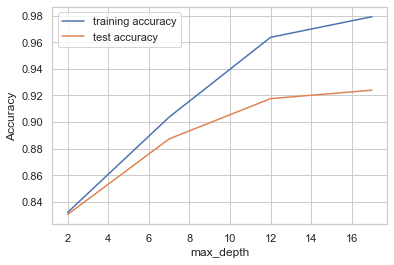

In [175]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The max_Depth ranges between 10- 12

### Tuning n-estimators?

In [176]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf.fit(df_train_pca, Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [177]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.17,0.09,0.09,0.00,100,{'n_estimators': 100},0.91,0.91,0.91,0.91,0.90,0.91,0.00,4,0.94,0.94,0.95,0.95,0.94,0.95,0.00
1,69.42,0.35,0.45,0.01,500,{'n_estimators': 500},0.91,0.91,0.91,0.91,0.91,0.91,0.00,1,0.95,0.95,0.95,0.95,0.95,0.95,0.00
2,120.06,0.44,0.67,0.07,900,{'n_estimators': 900},0.91,0.91,0.91,0.90,0.91,0.91,0.00,2,0.95,0.95,0.95,0.95,0.95,0.95,0.00
3,136.10,13.86,0.69,0.02,1300,{'n_estimators': 1300},0.91,0.91,0.91,0.91,0.91,0.91,0.00,2,0.95,0.95,0.95,0.95,0.95,0.95,0.00


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'Accuracy')

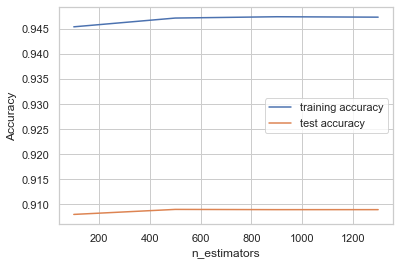

In [178]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning max_features

In [179]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf.fit(df_train_pca, Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [180]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.50,0.04,0.08,0.00,4,{'max_features': 4},0.91,0.91,0.91,0.91,0.91,0.91,0.00,3,0.94,0.94,0.94,0.95,0.94,0.94,0.00
1,12.59,0.05,0.09,0.00,8,{'max_features': 8},0.91,0.91,0.91,0.90,0.91,0.91,0.00,1,0.95,0.94,0.95,0.95,0.95,0.95,0.00
2,24.67,1.11,0.09,0.00,14,{'max_features': 14},0.91,0.91,0.91,0.91,0.91,0.91,0.00,2,0.94,0.94,0.95,0.95,0.95,0.95,0.00
3,36.31,0.22,0.08,0.01,20,{'max_features': 20},0.91,0.91,0.91,0.90,0.91,0.91,0.00,4,0.95,0.94,0.95,0.95,0.95,0.95,0.00
4,38.05,3.21,0.05,0.01,24,{'max_features': 24},0.91,0.91,0.91,0.91,0.90,0.91,0.00,5,0.94,0.94,0.94,0.95,0.95,0.95,0.00


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_features')

Text(0, 0.5, 'Accuracy')

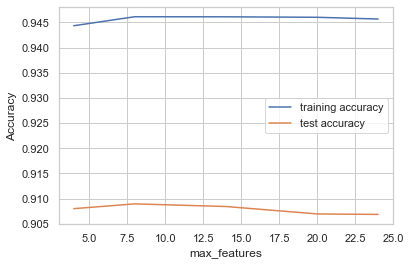

In [181]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The max_features can be considered between 8 to 10

#### Tuning min_samples_leaf

In [182]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf.fit(df_train_pca, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [183]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.33,0.04,0.08,0.00,100,{'min_samples_leaf': 100},0.87,0.88,0.88,0.87,0.88,0.88,0.00,1,0.89,0.88,0.89,0.89,0.89,0.89,0.00
1,8.44,0.04,0.08,0.00,150,{'min_samples_leaf': 150},0.87,0.87,0.88,0.87,0.87,0.87,0.00,2,0.88,0.88,0.88,0.88,0.88,0.88,0.00
2,8.49,0.67,0.08,0.00,200,{'min_samples_leaf': 200},0.86,0.87,0.87,0.87,0.87,0.87,0.00,3,0.87,0.87,0.87,0.87,0.87,0.87,0.00
3,8.52,0.07,0.08,0.01,250,{'min_samples_leaf': 250},0.86,0.87,0.87,0.86,0.86,0.86,0.00,4,0.87,0.87,0.87,0.87,0.87,0.87,0.00
4,7.61,0.93,0.07,0.01,300,{'min_samples_leaf': 300},0.86,0.86,0.86,0.86,0.86,0.86,0.00,5,0.87,0.86,0.86,0.87,0.87,0.87,0.00


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_samples_leaf')

Text(0, 0.5, 'Accuracy')

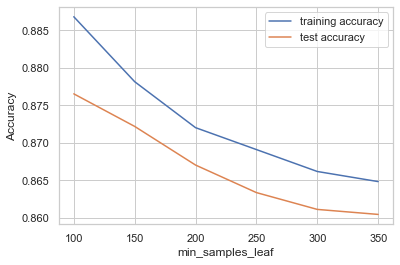

In [184]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The min_samples_leaf can be considered in between 100 & 150

#### Tuning min_samples_split

In [185]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [186]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.67,0.16,0.04,0.00,200,{'min_samples_split': 200},0.89,0.89,0.90,0.89,0.89,0.89,0.00,1,0.91,0.91,0.91,0.91,0.91,0.91,0.00
1,5.40,0.04,0.04,0.00,250,{'min_samples_split': 250},0.88,0.89,0.89,0.89,0.89,0.89,0.00,2,0.90,0.90,0.90,0.90,0.90,0.90,0.00
2,5.33,0.18,0.04,0.00,300,{'min_samples_split': 300},0.88,0.88,0.89,0.88,0.88,0.88,0.00,3,0.90,0.89,0.89,0.90,0.89,0.90,0.00
3,5.24,0.25,0.04,0.00,350,{'min_samples_split': 350},0.87,0.88,0.88,0.88,0.88,0.88,0.00,4,0.89,0.89,0.89,0.89,0.89,0.89,0.00
4,4.99,0.04,0.03,0.00,400,{'min_samples_split': 400},0.87,0.88,0.88,0.88,0.88,0.88,0.00,5,0.89,0.89,0.89,0.89,0.89,0.89,0.00


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_samples_split')

Text(0, 0.5, 'Accuracy')

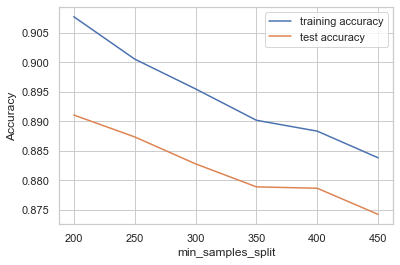

In [187]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min samples split can be considere3d between 200 to 300

## Create the parameter grid based on hyperparameters 

In [188]:
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [189]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  6.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             refit='recall_score', verbose=1)

In [190]:
print('Accuracy is',grid_search.best_score_,'Best params are: ',grid_search.best_params_)

Accuracy is 0.8768571428571429 Best params are:  {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [191]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=200)

In [192]:
# fit
rfc.fit(df_train_pca,Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=8,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=200)

In [193]:
print(classification_report(Y_test,y_pred_default))
print(confusion_matrix(Y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(Y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8272
           1       0.61      0.18      0.27       729

    accuracy                           0.92      9001
   macro avg       0.77      0.58      0.62      9001
weighted avg       0.91      0.92      0.90      9001

[[8188   84]
 [ 600  129]]
accuracy_score:   0.9240084435062771


In [194]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(Y_test,y_pred_default)
confusion_rf_hyper

array([[8188,   84],
       [ 600,  129]])

In [195]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(Y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.9240084435062771
Sensitivity:  0.17695473251028807
Specificity:  0.9898452611218569
false postive rate:  0.010154738878143133
positive predictive value:  0.6056338028169014
Negative predictive value:  0.9317250796540737
Misclassification Rate:  0.07599155649372293


### RANDOM FOREST(MODEL WITHOUT PCA)

In [196]:
# Initialising Random Forest
# The class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

In [197]:
# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

In [198]:
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

In [199]:
# create gridsearch object
model = GridSearchCV(estimator=forest, 
                     cv=folds, 
                     param_grid=params, 
                     scoring='roc_auc', 
                     n_jobs=-1, verbose=1)

In [200]:
# fit model
model.fit(X_train, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:   39.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   40.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [201]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9254903072728892
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


**Predictions & Evaluation on Test Data**

In [202]:
# predict churn on test data
y_pred = model.predict(X_test)

In [203]:
# # create confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[8142  130]
 [ 402  327]]


In [204]:
# # check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.45
Specificity: 	0.98


In [205]:
# # check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(Y_test, y_pred_prob),2))

AUC:    	 0.92


**Hyperparameter tuning - Random Forest**

The following hyperparameters are  considered for hyperparameter tuning in a random forest classifier. 

- **max_features** : The number of features to consider when looking for the best split.
- **max_depth** : The maximum depth of the tree. 
- **n_estimators**: The number of trees in the forest.
- **min_samples_split** : The minimum number of samples required to split an internal node.
- **min_samples_leaf** :  The minimum number of samples required to be at a leaf node.

**1- TUNING max_depth**

In [206]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 40, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                cv=n_folds, 
                scoring="accuracy",
                return_train_score=True)
rf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 40, 5)}, return_train_score=True,
             scoring='accuracy')

In [207]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.37,0.16,0.03,0.00,2,{'max_depth': 2},0.94,0.94,0.94,0.94,0.94,0.94,0.00,8,0.94,0.94,0.94,0.94,0.94,0.94,0.00
1,2.88,0.16,0.03,0.00,7,{'max_depth': 7},0.94,0.94,0.94,0.94,0.95,0.94,0.00,7,0.95,0.95,0.95,0.95,0.95,0.95,0.00
2,4.17,0.07,0.04,0.00,12,{'max_depth': 12},0.95,0.95,0.94,0.94,0.95,0.95,0.00,1,0.97,0.97,0.98,0.98,0.97,0.98,0.00
3,4.84,0.08,0.05,0.00,17,{'max_depth': 17},0.95,0.94,0.94,0.94,0.95,0.94,0.00,3,1.00,1.00,1.00,1.00,0.99,1.00,0.00
4,5.04,0.05,0.05,0.00,22,{'max_depth': 22},0.95,0.94,0.94,0.94,0.95,0.94,0.00,6,1.00,1.00,1.00,1.00,1.00,1.00,0.00


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Accuracy')

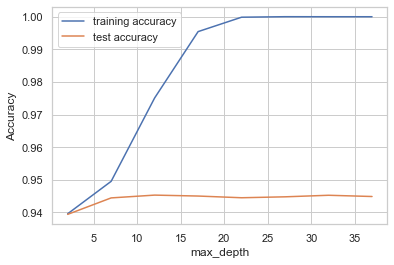

In [208]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"],label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Here we observe that the 

    We can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score becomme stagnant. 
    The ensemble tries to overfit as we increase the max_depth beyond 20. 
    Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest. 
    7 and 16 value have peek convergence and can be used for grid veiw search.

**2.Tuning n-estimators**

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

In [209]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 2000, 200)}

# instantiate the model with low value of max-depth = 4
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                cv=n_folds, 
                scoring="accuracy",
                return_train_score=True)
rf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 2000, 200)},
             return_train_score=True, scoring='accuracy')

In [210]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.68,0.05,0.03,0.00,100,{'n_estimators': 100},0.94,0.94,0.94,0.94,0.94,0.94,0.00,7,0.94,0.94,0.94,0.94,0.94,0.94,0.00
1,5.18,0.41,0.08,0.01,300,{'n_estimators': 300},0.94,0.94,0.94,0.94,0.94,0.94,0.00,1,0.94,0.94,0.94,0.94,0.94,0.94,0.00
2,8.35,0.28,0.11,0.00,500,{'n_estimators': 500},0.94,0.94,0.94,0.94,0.94,0.94,0.00,3,0.94,0.94,0.94,0.94,0.94,0.94,0.00
3,11.59,0.16,0.17,0.02,700,{'n_estimators': 700},0.94,0.94,0.94,0.94,0.94,0.94,0.00,5,0.94,0.94,0.94,0.94,0.94,0.94,0.00
4,15.11,0.33,0.21,0.01,900,{'n_estimators': 900},0.94,0.94,0.94,0.94,0.94,0.94,0.00,4,0.94,0.94,0.94,0.94,0.94,0.94,0.00


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'n-estimators')

Text(0, 0.5, 'Accuracy')

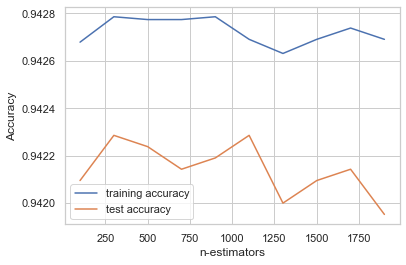

In [211]:
# plotting accuracies with n-estimators
plt.figure()
plt.plot(scores["param_n_estimators"], scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_n_estimators"], scores["mean_test_score"],label="test accuracy")
plt.xlabel("n-estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see here the test accuracy drops after 300.

**3.Tuning max-features**
Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [212]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [20,30,40,50,60]}

# instantiate the model with low value of max-depth = 4
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                cv=n_folds, 
                scoring="accuracy",
                return_train_score=True)
rf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [20, 30, 40, 50, 60]},
             return_train_score=True, scoring='accuracy')

In [213]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.74,0.07,0.02,0.00,20,{'max_features': 20},0.94,0.94,0.94,0.94,0.95,0.94,0.00,4,0.94,0.94,0.94,0.94,0.94,0.94,0.00
1,5.42,0.02,0.02,0.00,30,{'max_features': 30},0.95,0.94,0.94,0.94,0.95,0.94,0.00,1,0.94,0.95,0.95,0.95,0.94,0.94,0.00
2,7.80,0.34,0.03,0.00,40,{'max_features': 40},0.94,0.94,0.94,0.94,0.95,0.94,0.00,2,0.94,0.94,0.95,0.94,0.94,0.94,0.00
3,9.03,0.23,0.02,0.00,50,{'max_features': 50},0.94,0.94,0.94,0.94,0.95,0.94,0.00,3,0.94,0.94,0.94,0.95,0.94,0.94,0.00
4,10.67,0.11,0.02,0.00,60,{'max_features': 60},0.94,0.94,0.94,0.94,0.95,0.94,0.00,4,0.95,0.94,0.94,0.94,0.94,0.94,0.00


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_features')

Text(0, 0.5, 'Accuracy')

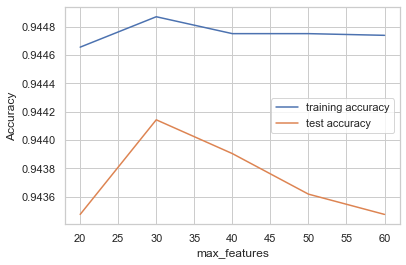

In [214]:
# plotting accuracies with max features
plt.figure()
plt.plot(scores["param_max_features"], scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_max_features"], scores["mean_test_score"],label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see the maximum number test accuracy is high for features between 20 and 40. After 40 the test accuracy seems to drop

**4.Tuning min_samples_leaf**

In [215]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 100, 10)}

# instantiate the model with low value of max-depth = 4
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                cv=n_folds, 
                scoring="accuracy",
                return_train_score=True)
rf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(1, 100, 10)},
             return_train_score=True, scoring='accuracy')

In [216]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.08,0.07,0.05,0.00,1,{'min_samples_leaf': 1},0.95,0.95,0.94,0.94,0.95,0.94,0.00,1,1.00,1.00,1.00,1.00,1.00,1.00,0.00
1,4.52,0.09,0.05,0.00,11,{'min_samples_leaf': 11},0.95,0.94,0.94,0.94,0.95,0.94,0.00,3,0.95,0.95,0.95,0.95,0.95,0.95,0.00
2,4.27,0.13,0.04,0.00,21,{'min_samples_leaf': 21},0.95,0.94,0.94,0.94,0.95,0.94,0.00,2,0.95,0.95,0.95,0.95,0.95,0.95,0.00
3,3.88,0.09,0.04,0.00,31,{'min_samples_leaf': 31},0.94,0.94,0.94,0.94,0.95,0.94,0.00,4,0.95,0.95,0.95,0.95,0.95,0.95,0.00
4,3.73,0.09,0.04,0.00,41,{'min_samples_leaf': 41},0.94,0.94,0.94,0.94,0.94,0.94,0.00,5,0.95,0.95,0.95,0.95,0.95,0.95,0.00


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_samples_leaf')

Text(0, 0.5, 'Accuracy')

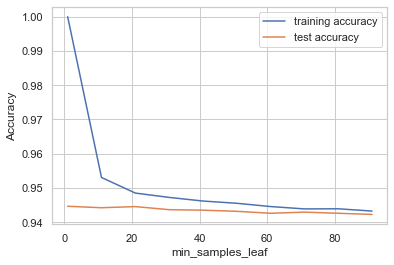

In [217]:
# plotting accuracies with min samples leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"],label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The accuracy seems to be constant for test data after 20.  Also we can see overfitting of data.
We need to select minimum sample leaf between 10 to 20 for optimal results

**5.Tuning min_samples_split**

In [218]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(10, 100, 10)}

# instantiate the model with low value of max-depth = 4
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                cv=n_folds, 
                scoring="accuracy",
                return_train_score=True)
rf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(10, 100, 10)},
             return_train_score=True, scoring='accuracy')

In [219]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.40,0.16,0.06,0.01,10,{'min_samples_split': 10},0.95,0.94,0.94,0.94,0.95,0.94,0.00,4,0.98,0.98,0.98,0.98,0.98,0.98,0.00
1,6.38,0.24,0.06,0.01,20,{'min_samples_split': 20},0.95,0.95,0.94,0.94,0.95,0.94,0.00,2,0.96,0.96,0.96,0.96,0.96,0.96,0.00
2,5.90,0.27,0.06,0.01,30,{'min_samples_split': 30},0.95,0.94,0.94,0.94,0.95,0.94,0.00,6,0.96,0.96,0.96,0.96,0.96,0.96,0.00
3,5.18,0.07,0.05,0.00,40,{'min_samples_split': 40},0.95,0.94,0.94,0.94,0.95,0.94,0.00,3,0.95,0.95,0.95,0.95,0.95,0.95,0.00
4,5.71,0.72,0.05,0.01,50,{'min_samples_split': 50},0.94,0.94,0.94,0.94,0.95,0.94,0.00,7,0.95,0.95,0.95,0.95,0.95,0.95,0.00


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_samples_split')

Text(0, 0.5, 'Accuracy')

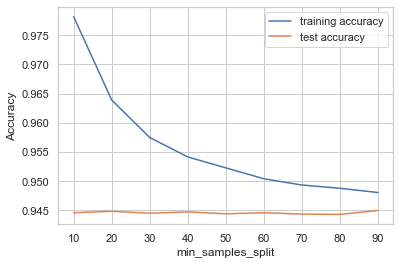

In [220]:
# plotting accuracies with min samples split
plt.figure()
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"],label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Apparently, accuracy of test scores seems to be inconsitent. ALso the test data becomes overfitted after 60.

### Grid Search to Find Optimal Hyperparameters

In [221]:
# Create the parameter grid based on the results obtained in the hyperparameters
param_grid = {
    'max_depth': [6,16,20],
    'n_estimators': [300],
    'max_features': [40],
    'min_samples_leaf': [10,20],
    'min_samples_split': [10,20,30]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [222]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 17.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 16, 20], 'max_features': [40],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [300]},
             verbose=1)

In [223]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.944952380952381 using {'max_depth': 20, 'max_features': 40, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 300}


### **Fitting the final model with the best parameters obtained from grid search.**

In [247]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=20,
                             min_samples_leaf=10, 
                             min_samples_split=20,
                             max_features=40,
                             n_estimators=300)

In [248]:
# fit
rfc.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=40,
                       min_samples_leaf=10, min_samples_split=20,
                       n_estimators=300)

In [249]:
# predict
predictions = rfc.predict(X_test)

In [250]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8272
           1       0.59      0.66      0.62       729

    accuracy                           0.94      9001
   macro avg       0.78      0.81      0.79      9001
weighted avg       0.94      0.94      0.94      9001



In [251]:
print(confusion_matrix(Y_test,predictions))

[[7936  336]
 [ 248  481]]


In [252]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test, predictions, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.66
Specificity: 	0.96


In [253]:
# check area under curve
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(Y_test, y_pred_prob),2))

AUC:    	 0.92


In [254]:
print('Accuracy Score:  ',accuracy_score(Y_test,predictions))

Accuracy Score:   0.935118320186646


## Choosing best Features

In [231]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model_ = RandomForestClassifier(n_estimators=100, max_features=max_features,
                                   class_weight={0:0.1, 1: 0.9}, oob_score=True, 
                                   random_state=4, verbose=1)

9


In [232]:
# fit model

rf_model_.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.1s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=9,
                       oob_score=True, random_state=4, verbose=1)

In [233]:
# OOB score
rf_model_.oob_score_

0.9433333333333334

In [234]:
# predict churn on test data
y_pred = rf_model_.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model_.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(Y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[8151  121]
 [ 420  309]]
Sensitivity: 	0.42
Specificity: 	0.99
ROC:    	 0.92


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [235]:
print('accuracy_score : ',accuracy_score(Y_test,y_pred))

accuracy_score :  0.9398955671592045


## Feature Importance

In [236]:
# predictors
features = telecom_df_final.drop('churn', axis=1).columns

# feature_importance
importance = rf_model_.feature_importances_

In [237]:
len(features)

79

In [238]:
len(importance)

79

In [239]:
# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

In [240]:
# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,loc_ic_t2m_mou_8,9.46
1,loc_ic_t2t_mou_8,6.40
2,loc_og_t2m_mou_8,5.80
3,total_rech_amt_8,4.35
4,last_day_rch_amt_8,4.26
5,roam_ic_mou_8,3.47
6,arpu_8,3.45
7,roam_og_mou_8,3.22
8,loc_ic_t2f_mou_8,2.65
9,max_rech_amt_8,2.44


## Extracting top 15 features

In [241]:
# extract top 'n' features
top_n = 15
top_features = feature_importance.variables[0:top_n]

In [242]:
top_features_df = pd.DataFrame(feature_importance[0:top_n])

In [243]:
top_features_df

,variables,importance_percentage
0,loc_ic_t2m_mou_8,9.46
1,loc_ic_t2t_mou_8,6.40
2,loc_og_t2m_mou_8,5.80
3,total_rech_amt_8,4.35
4,last_day_rch_amt_8,4.26
5,roam_ic_mou_8,3.47
6,arpu_8,3.45
7,roam_og_mou_8,3.22
8,loc_ic_t2f_mou_8,2.65
9,max_rech_amt_8,2.44


In [244]:
top_features

0       loc_ic_t2m_mou_8
1       loc_ic_t2t_mou_8
2       loc_og_t2m_mou_8
3       total_rech_amt_8
4     last_day_rch_amt_8
5          roam_ic_mou_8
6                 arpu_8
7          roam_og_mou_8
8       loc_ic_t2f_mou_8
9         max_rech_amt_8
10      loc_og_t2t_mou_8
11    av_rech_amt_data_8
12          offnet_mou_8
13      std_ic_t2m_mou_8
14           onnet_mou_8
Name: variables, dtype: object

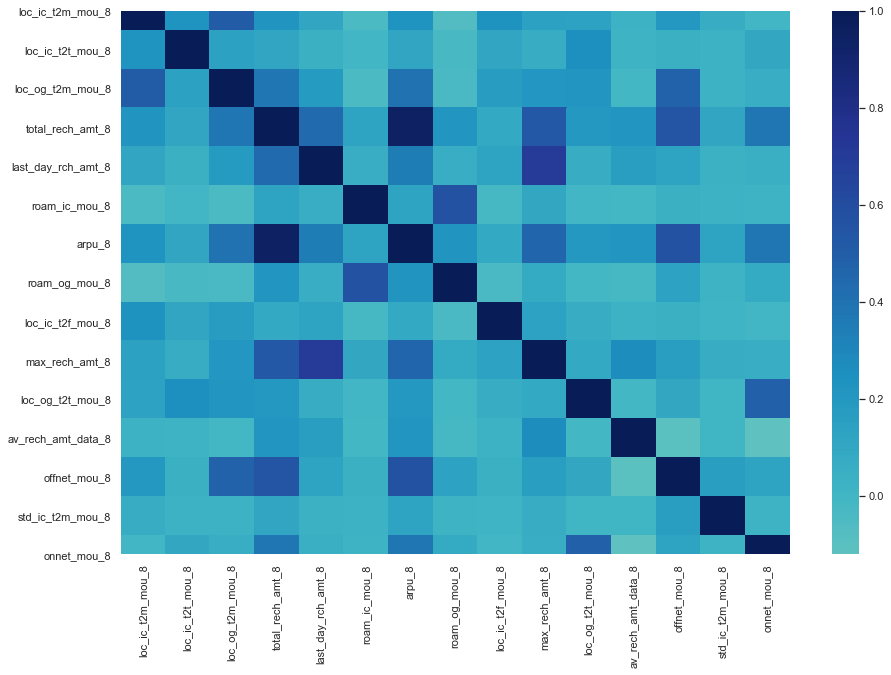

In [245]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(15,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap="YlGnBu")

<Figure size 720x576 with 0 Axes>

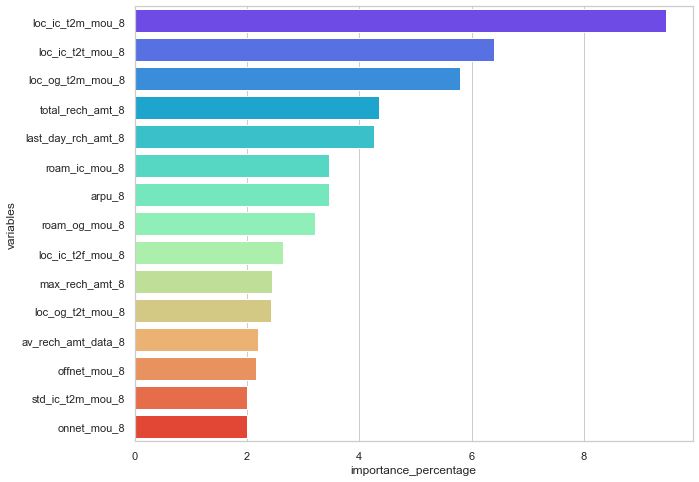

In [246]:
# bar plot to determine the important variables 
plt.figure(figsize=(10,8))
sns.barplot(y = 'variables', x='importance_percentage', palette='rainbow', data = top_features_df)
plt.show()

## Recomendation for Model Selection
    
       We would recommend Logistic Regression and Random Forest models with PCA since both have better performance than Decision Tree model as seen from the accuracy scores below

                        MODEL	                  ACCURACY	    SPECIFICITY	    SENSITIVITY
    WITH PCA	LOGISTIC REGRESSION 	            0.92        	0.99	        0.24
                LOGISTIC REGRESSION (WITH HYPER)	0.83	        0.84	        0.81
                DECISION TREE	                    0.71	        0.79	        0.71
                DECISION TREE(WITH HYPER)	        0.81	        0.82	        0.69
                RANDOM FOREST	                    0.92	        0.99	        0.17
                RANDOM FOREST(WITH HYPER)	        0.92	        0.99	        0.17
    WITHOUT PCA	RANDOM FOREST	                   0.91	        0.99	        0.44
                RANDOM FOREST(WITH HYPER)	        0.92	        0.96	        0.66
    
    

## Recomendation for Top Features

Churn can be determmined from the month 8 attributes . We see Local Incoming for Month 8, Total Recharge Amount for month 8, Average Revenue Per Customer for Month 8 and Max Recharge Amount for Month 8 are some of the most important predictor variables which would helpful to predict churn.  
   
   
From our analysis the top 15 features affecting churn are as listed below:   
    TOP FEATURES AFFECTING THE MODEL ARE:
        loc_ic_t2m_mou_8
        loc_ic_t2t_mou_8
        loc_og_t2m_mou_8
        total_rech_amt_8
        last_day_rch_amt_8
        roam_ic_mou_8
        arpu_8
        roam_og_mou_8
        loc_ic_t2f_mou_8
        max_rech_amt_8
        loc_og_t2t_mou_8
        av_rech_amt_data_8
        offnet_mou_8
        std_ic_t2m_mou_8
        onnet_mou_8
    
    1- Incoming and Outgoing Calls for 8th month are strong indicators of churn behaviour
    2- Average revenue per user seems to be most important feature in determining churn prediction.
    3- Local Outgoing calls made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.

Some of the recommended strategies to manage customer churn based on observations are as listed below:
    
      1- The telecom company needs to pay attention to the roaming rates of minutes of usage for incoming and outgoing. They need to provide good offers to the customers who are using services from a roaming zone since they are more likely to churn if the call are too expensive for them.
   
    2-The company needs to focus on the STD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
    
    3- Local Outgoing calls made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.  The telecom company should look into the call rates and make some revisions based on usage.
    
    4- To look into the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.